**Table of Contents** <br>
* [1. Imports](#imports)
    * [1.1. Importing the Libraries](#importlibraries)
    * [1.2. Importing the Dataset](#importdatasets)
* [2. Initial Analysis and Overview](#initialanalysisandoverview)
* [3. Imputation of Missing Values](#missingvalues)
* [4. Coherence Checking](#coherencechecking)
* [5. Outlier Removal](#outliers)
* [6. Feature Engineering](#transformation)
* [7. Correlations](#correlations)
* [8. Variables Distributions and Variables Selection](#selection)
* [9. Data Normalization and Encoding](#encoding)
* [10. Exporting the final datasets](#exports)


#### Initial Note:
Code from cells without a specific source mentioned is either original or adapted from: https://github.com/joaopfonseca/Data-Mining-22-23


<hr>
<a class="anchor" id="imports">
    
# 1. Imports
    
</a>

<a class="anchor" id="importlibraries">

## 1.1. Importing the Libraries

</a>

In [202]:
#!pip install kmodes
#!pip install graphviz
import graphviz
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.impute import KNNImputer
sns.set()
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from collections import Counter
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
import umap
from mpl_toolkits.mplot3d import Axes3D
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView
from sklearn.metrics import calinski_harabasz_score
import seaborn as sb
from kmodes.kprototypes import KPrototypes
from matplotlib.lines import Line2D
from sklearn.tree import export_graphviz
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans


<a class="anchor" id="importlibraries">

## 1.2. Importing the Dataset

</a>

In [301]:
df = pd.read_sas('a2z_insurance.sas7bdat')

In [302]:
df

CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  \
0          1.0        1985.0     1982.0  b'2 - High School'    2177.0   
1          2.0        1981.0     1995.0  b'2 - High School'     677.0   
2          3.0        1991.0     1970.0        b'1 - Basic'    2277.0   
3          4.0        1990.0     1981.0      b'3 - BSc/MSc'    1099.0   
4          5.0        1986.0     1973.0      b'3 - BSc/MSc'    1763.0   
...        ...           ...        ...                 ...       ...   
10291  10292.0        1984.0     1949.0          b'4 - PhD'    3188.0   
10292  10293.0        1977.0     1952.0        b'1 - Basic'    2431.0   
10293  10294.0        1994.0     1976.0      b'3 - BSc/MSc'    2918.0   
10294  10295.0        1981.0     1977.0        b'1 - Basic'    1971.0   
10295  10296.0        1990.0     1981.0          b'4 - PhD'    2815.0   

       GeoLivArea  Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  \
0             1.0       1.0      380.97        0.39     375.85          79.45   
1             4.0       1.0     -131.13        1.12      77.46         416.20   
2             3.0       0.0      504.67        0.28     206.15         224.50   
3             4.0       1.0      -16.99        0.99     182.48          43.35   
4             4.0       1.0       35.23        0.90     338.62          47.80   
...           ...       ...         ...         ...        ...            ...   
10291         2.0       0.0       -0.11        0.96     393.74          49.45   
10292         3.0       0.0     1405.60        0.00     133.58        1035.75   
10293         1.0       1.0      524.10        0.21     403.63         132.80   
10294         2.0       1.0      250.05        0.65     188.59         211.15   
10295         1.0       1.0      463.75        0.27     414.08          94.45   

       PremHealth  PremLife  PremWork  
0          146.36     47.01     16.89  
1          116.69    194.48    106.13  
2          124.58     86.35     99.02  
3          311.17     35.34     28.34  
4          182.59     18.78     41.45  
...           ...       ...       ...  
10291      173.81      9.78     14.78  
10292      143.25     12.89    105.13  
10293      142.25     12.67      4.89  
10294      198.37     63.90    112.91  
10295      141.25      6.89     12.89  

[10296 rows x 14 columns]

<hr>
<a class="anchor" id="initialanalysisandoverview">
    
# 2. Initial Analysis and Overview
    
</a>

In [303]:
df_original = df.copy()

In [304]:
non_metric_features = ["EducDeg", "GeoLivArea","Children"]
metric_features = df.columns.drop(non_metric_features).to_list()

In [305]:
#deleting the ' character in order to make working with the variable 'EducDeg' easier
df["EducDeg"] = (df["EducDeg"].astype(str)).str.replace("'","")

In [306]:
df.EducDeg = df.EducDeg.str.extract('(\d+)')
df['EducDeg'] = pd.to_numeric(df['EducDeg'])
#converting 'education' into an ordinal number
# 1 - 'b1 - Basic'
# 2 - 'b2 - High School'
# 3 - 'b3 - BSc/MSc'
# 4 - 'b4 - PhD'

In [307]:
df.head(1)

CustID  FirstPolYear  BirthYear  EducDeg  MonthSal  GeoLivArea  Children  \
0     1.0        1985.0     1982.0      2.0    2177.0         1.0       1.0   

   CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  PremLife  \
0      380.97        0.39     375.85          79.45      146.36     47.01   

   PremWork  
0     16.89

In [308]:
df.describe().T

count         mean          std        min      25%      50%  \
CustID         10296.0  5148.500000  2972.343520       1.00  2574.75  5148.50   
FirstPolYear   10266.0  1991.062634   511.267913    1974.00  1980.00  1986.00   
BirthYear      10279.0  1968.007783    19.709476    1028.00  1953.00  1968.00   
EducDeg        10279.0     2.478938     0.795565       1.00     2.00     3.00   
MonthSal       10260.0  2506.667057  1157.449634     333.00  1706.00  2501.50   
GeoLivArea     10295.0     2.709859     1.266291       1.00     1.00     3.00   
Children       10275.0     0.706764     0.455268       0.00     0.00     1.00   
CustMonVal     10296.0   177.892605  1945.811505 -165680.42    -9.44   186.87   
ClaimsRate     10296.0     0.742772     2.916964       0.00     0.39     0.72   
PremMotor      10262.0   300.470252   211.914997      -4.11   190.59   298.61   
PremHousehold  10296.0   210.431192   352.595984     -75.00    49.45   132.80   
PremHealth     10253.0   171.580833   296.405976      -2.11   111.80   162.81   
PremLife       10192.0    41.855782    47.480632      -7.00     9.89    25.56   
PremWork       10210.0    41.277514    51.513572     -12.00    10.67    25.67   

                     75%       max  
CustID         7722.2500  10296.00  
FirstPolYear   1992.0000  53784.00  
BirthYear      1983.0000   2001.00  
EducDeg           3.0000      4.00  
MonthSal       3290.2500  55215.00  
GeoLivArea        4.0000      4.00  
Children          1.0000      1.00  
CustMonVal      399.7775  11875.89  
ClaimsRate        0.9800    256.20  
PremMotor       408.3000  11604.42  
PremHousehold   290.0500  25048.80  
PremHealth      219.8200  28272.00  
PremLife         57.7900    398.30  
PremWork         56.7900   1988.70

In [309]:
# Some variables look like they have outliers because it is visible the high dispersion of the data comparing the minimum, the  maximum and the median values of the variables
# Strange values:
    #Birth_Year = 1028.00
    #First_Pol_Year = 53784.00
    #CMV = -165680.42

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  float64
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(14)
memory usage: 1.1 MB


<hr>
<a class="anchor" id="missingvalues">
    
# 3. Imputation of missing values
    
</a>


In [311]:
df_nm = df.copy()

In [312]:
df_nm.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [313]:
modes = df_nm[non_metric_features].mode().loc[0]
df_nm.fillna(modes, inplace=True)

In [314]:
df_nm.isna().sum()
#Children and GeoLiv Area have no missing values

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg            0
MonthSal          36
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [315]:
df_metrics = df_nm.columns.drop(["EducDeg",'GeoLivArea','Children']).to_list()
scaler = MinMaxScaler()
scaled_feat = scaler.fit(df_nm[metric_features])
x = scaler.transform(df_nm[metric_features])

imputer= KNNImputer(n_neighbors=5,weights='uniform')
x = imputer.fit_transform(x)
x = scaler.inverse_transform(x)
x = pd.DataFrame(x)

df1 = x
df1 =df1.rename({0:'CustID', 1:'FirstPolYear',2:'BirthYear',3:'MonthSal',4:'CustMonVal',5:'ClaimsRate',6:'PremMotor',7:'PremHousehold',8:'PremHealth',9:'PremLife',10:'PremWork'},axis = 1)
df1['EducDeg']=df_nm['EducDeg']
df1['GeoLivArea']=df_nm['GeoLivArea']
df1['Children']=df_nm['Children']

In [316]:
df1 = df1.astype({"FirstPolYear":"int","BirthYear":"int","GeoLivArea":"int","Children":"int"})

In [317]:
df1.isna().sum()

CustID           0
FirstPolYear     0
BirthYear        0
MonthSal         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
EducDeg          0
GeoLivArea       0
Children         0
dtype: int64

In [318]:
df = df1.copy()

In [319]:
df

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
0          1.0          1985       1981    2177.0      380.97        0.39   
1          2.0          1981       1995     677.0     -131.13        1.12   
2          3.0          1991       1970    2277.0      504.67        0.28   
3          4.0          1990       1981    1099.0      -16.99        0.99   
4          5.0          1985       1973    1763.0       35.23        0.90   
...        ...           ...        ...       ...         ...         ...   
10291  10292.0          1984       1949    3188.0       -0.11        0.96   
10292  10293.0          1977       1951    2431.0     1405.60        0.00   
10293  10294.0          1993       1976    2918.0      524.10        0.21   
10294  10295.0          1981       1977    1971.0      250.05        0.65   
10295  10296.0          1990       1981    2815.0      463.75        0.27   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
0         375.85          79.45      146.36     47.01     16.89      2.0   
1          77.46         416.20      116.69    194.48    106.13      2.0   
2         206.15         224.50      124.58     86.35     99.02      1.0   
3         182.48          43.35      311.17     35.34     28.34      3.0   
4         338.62          47.80      182.59     18.78     41.45      3.0   
...          ...            ...         ...       ...       ...      ...   
10291     393.74          49.45      173.81      9.78     14.78      4.0   
10292     133.58        1035.75      143.25     12.89    105.13      1.0   
10293     403.63         132.80      142.25     12.67      4.89      3.0   
10294     188.59         211.15      198.37     63.90    112.91      1.0   
10295     414.08          94.45      141.25      6.89     12.89      4.0   

       GeoLivArea  Children  
0               1         1  
1               4         1  
2               3         0  
3               4         1  
4               4         1  
...           ...       ...  
10291           2         0  
10292           3         0  
10293           1         1  
10294           2         1  
10295           1         1  

[10296 rows x 14 columns]

<hr>
<a class="anchor" id="coherencechecking">

## 4. Coherence Checking

</a>

In [320]:
df.isna().sum()
# There are missing values in 9 variables

CustID           0
FirstPolYear     0
BirthYear        0
MonthSal         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
EducDeg          0
GeoLivArea       0
Children         0
dtype: int64

In [321]:
df = df.drop_duplicates(subset=df.columns.difference(['CustID']))

In [322]:
df

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
0          1.0          1985       1981    2177.0      380.97        0.39   
1          2.0          1981       1995     677.0     -131.13        1.12   
2          3.0          1991       1970    2277.0      504.67        0.28   
3          4.0          1990       1981    1099.0      -16.99        0.99   
4          5.0          1985       1973    1763.0       35.23        0.90   
...        ...           ...        ...       ...         ...         ...   
10291  10292.0          1984       1949    3188.0       -0.11        0.96   
10292  10293.0          1977       1951    2431.0     1405.60        0.00   
10293  10294.0          1993       1976    2918.0      524.10        0.21   
10294  10295.0          1981       1977    1971.0      250.05        0.65   
10295  10296.0          1990       1981    2815.0      463.75        0.27   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
0         375.85          79.45      146.36     47.01     16.89      2.0   
1          77.46         416.20      116.69    194.48    106.13      2.0   
2         206.15         224.50      124.58     86.35     99.02      1.0   
3         182.48          43.35      311.17     35.34     28.34      3.0   
4         338.62          47.80      182.59     18.78     41.45      3.0   
...          ...            ...         ...       ...       ...      ...   
10291     393.74          49.45      173.81      9.78     14.78      4.0   
10292     133.58        1035.75      143.25     12.89    105.13      1.0   
10293     403.63         132.80      142.25     12.67      4.89      3.0   
10294     188.59         211.15      198.37     63.90    112.91      1.0   
10295     414.08          94.45      141.25      6.89     12.89      4.0   

       GeoLivArea  Children  
0               1         1  
1               4         1  
2               3         0  
3               4         1  
4               4         1  
...           ...       ...  
10291           2         0  
10292           3         0  
10293           1         1  
10294           2         1  
10295           1         1  

[10293 rows x 14 columns]

#### FirstPolYear

In [323]:
df['FirstPolYear'].unique()

array([ 1985,  1981,  1991,  1990,  1979,  1988,  1976,  1982,  1977,
        1998,  1974,  1978,  1995,  1980,  1984,  1989,  1987,  1993,
        1992,  1996,  1986, 53784])

In [324]:
df.loc[(df.FirstPolYear >2016) | (df.FirstPolYear < 1896)]

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
9294  9295.0         53784       1948    3268.0      348.85        0.37   

      PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
9294      351.4           15.0      187.37     22.45     17.78      3.0   

      GeoLivArea  Children  
9294           1         0

In [325]:
#Removing the row with 'FirstPolYear' = 53784
df = df[df.FirstPolYear != 53784]

In [326]:
2016 - df.FirstPolYear.max()

18

#### BirthYear

In [327]:
df['BirthYear'].unique()

array([1981, 1995, 1970, 1973, 1956, 1943, 1974, 1978, 1948, 1945, 1958,
       1949, 2000, 1979, 1989, 1962, 1986, 1961, 1951, 1944, 1937, 1942,
       1972, 1953, 1966, 1955, 1941, 1938, 1967, 1984, 1980, 1946, 1965,
       1957, 1977, 1950, 1985, 1988, 1982, 1939, 1964, 1959, 1976, 1971,
       1954, 1969, 1994, 1992, 1997, 1963, 1990, 1998, 1993, 1947, 1987,
       1996, 1940, 1935, 1936, 2001, 1960, 1028])

In [328]:
#Removing the row with 'BirthYear' = 1028
df = df[df.BirthYear != 1028]

In [329]:
df

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
0          1.0          1985       1981    2177.0      380.97        0.39   
1          2.0          1981       1995     677.0     -131.13        1.12   
2          3.0          1991       1970    2277.0      504.67        0.28   
3          4.0          1990       1981    1099.0      -16.99        0.99   
4          5.0          1985       1973    1763.0       35.23        0.90   
...        ...           ...        ...       ...         ...         ...   
10291  10292.0          1984       1949    3188.0       -0.11        0.96   
10292  10293.0          1977       1951    2431.0     1405.60        0.00   
10293  10294.0          1993       1976    2918.0      524.10        0.21   
10294  10295.0          1981       1977    1971.0      250.05        0.65   
10295  10296.0          1990       1981    2815.0      463.75        0.27   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
0         375.85          79.45      146.36     47.01     16.89      2.0   
1          77.46         416.20      116.69    194.48    106.13      2.0   
2         206.15         224.50      124.58     86.35     99.02      1.0   
3         182.48          43.35      311.17     35.34     28.34      3.0   
4         338.62          47.80      182.59     18.78     41.45      3.0   
...          ...            ...         ...       ...       ...      ...   
10291     393.74          49.45      173.81      9.78     14.78      4.0   
10292     133.58        1035.75      143.25     12.89    105.13      1.0   
10293     403.63         132.80      142.25     12.67      4.89      3.0   
10294     188.59         211.15      198.37     63.90    112.91      1.0   
10295     414.08          94.45      141.25      6.89     12.89      4.0   

       GeoLivArea  Children  
0               1         1  
1               4         1  
2               3         0  
3               4         1  
4               4         1  
...           ...       ...  
10291           2         0  
10292           3         0  
10293           1         1  
10294           2         1  
10295           1         1  

[10291 rows x 14 columns]

In [330]:
df.loc[(df['BirthYear']- df['FirstPolYear'] > 0) ]
#1992 people had their first contact with the insurance company before they were born"
#Delete 'BirthYear' column

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
1          2.0          1981       1995     677.0     -131.13        1.12   
13        14.0          1982       2000    1043.0      -75.12        1.06   
20        21.0          1985       1986    1704.0      373.73        0.39   
22        23.0          1976       1986    1495.0      -89.79        1.08   
40        41.0          1993       1995    1177.0      121.36        0.84   
...        ...           ...        ...       ...         ...         ...   
10268  10269.0          1987       1988    1414.0       50.46        0.90   
10273  10274.0          1989       1992    1035.0      293.51        0.58   
10284  10285.0          1980       1987    1504.0       -1.55        0.96   
10288  10289.0          1982       1993    1465.0      795.15        0.35   
10290  10291.0          1993       1998     626.0      176.26        0.85   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
1          77.46         416.20      116.69    194.48    106.13      2.0   
13         44.34         342.85      127.69    267.94     94.46      1.0   
20        329.84          65.00      221.93      3.89     33.34      4.0   
22        209.04         308.95      192.48     64.79     54.90      2.0   
40         52.01         455.65      135.47    146.36    148.03      2.0   
...          ...            ...         ...       ...       ...      ...   
10268     129.58         167.80      184.48    165.92     75.46      3.0   
10273     235.71         195.60      103.13    170.92     58.12      2.0   
10284     390.63          29.45      179.70     -6.00     10.78      3.0   
10288      67.79         820.15      102.13    182.48     86.46      2.0   
10290       6.89         878.50      103.13    113.02    201.26      1.0   

       GeoLivArea  Children  
1               4         1  
13              3         1  
20              4         1  
22              1         1  
40              4         1  
...           ...       ...  
10268           3         1  
10273           1         1  
10284           4         1  
10288           1         1  
10290           3         1  

[1992 rows x 14 columns]

In [331]:
df.loc[(df['BirthYear']>=1993) & (df['EducDeg'] == 4.0 )]

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
4122  4123.0          1982       1993    1900.0       16.01        0.94   
5237  5238.0          1984       1993    1374.0      -37.89        1.02   
8084  8085.0          1993       1993     971.0      476.19        0.33   
8358  8359.0          1984       1993    1797.0      -69.32        1.08   

      PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
4122     333.73          87.80      170.70     21.56     19.45      4.0   
5237     509.65          70.00       72.57     12.89      2.89      4.0   
8084     297.61         158.35      223.82     19.67     45.23      4.0   
8358     488.87         -30.55       86.46      7.89      8.89      4.0   

      GeoLivArea  Children  
4122           1         1  
5237           4         1  
8084           4         1  
8358           1         1

In [332]:
df

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
0          1.0          1985       1981    2177.0      380.97        0.39   
1          2.0          1981       1995     677.0     -131.13        1.12   
2          3.0          1991       1970    2277.0      504.67        0.28   
3          4.0          1990       1981    1099.0      -16.99        0.99   
4          5.0          1985       1973    1763.0       35.23        0.90   
...        ...           ...        ...       ...         ...         ...   
10291  10292.0          1984       1949    3188.0       -0.11        0.96   
10292  10293.0          1977       1951    2431.0     1405.60        0.00   
10293  10294.0          1993       1976    2918.0      524.10        0.21   
10294  10295.0          1981       1977    1971.0      250.05        0.65   
10295  10296.0          1990       1981    2815.0      463.75        0.27   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
0         375.85          79.45      146.36     47.01     16.89      2.0   
1          77.46         416.20      116.69    194.48    106.13      2.0   
2         206.15         224.50      124.58     86.35     99.02      1.0   
3         182.48          43.35      311.17     35.34     28.34      3.0   
4         338.62          47.80      182.59     18.78     41.45      3.0   
...          ...            ...         ...       ...       ...      ...   
10291     393.74          49.45      173.81      9.78     14.78      4.0   
10292     133.58        1035.75      143.25     12.89    105.13      1.0   
10293     403.63         132.80      142.25     12.67      4.89      3.0   
10294     188.59         211.15      198.37     63.90    112.91      1.0   
10295     414.08          94.45      141.25      6.89     12.89      4.0   

       GeoLivArea  Children  
0               1         1  
1               4         1  
2               3         0  
3               4         1  
4               4         1  
...           ...       ...  
10291           2         0  
10292           3         0  
10293           1         1  
10294           2         1  
10295           1         1  

[10291 rows x 14 columns]

In [333]:
df.loc[(df['MonthSal'] > 0) & (df['BirthYear'] > 2000)]

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
659    660.0          1991       2001    1284.0      243.50        0.81   
689    690.0          1996       2001    1180.0      436.10        0.48   
865    866.0          1979       2001     562.0     1113.78        0.11   
1436  1437.0          1989       2001     823.0      281.28        0.60   
2579  2580.0          1985       2001    1006.0      267.95        0.67   
3146  3147.0          1993       2001     372.0      488.76        0.36   
4465  4466.0          1978       2001     958.0     -204.59        1.11   
4483  4484.0          1982       2001    1241.0      909.17        0.13   
5347  5348.0          1980       2001    1119.0      796.71        0.23   
5607  5608.0          1974       2001    1131.0      -25.00        1.00   
8962  8963.0          1978       2001    1117.0     1280.58        0.11   
9906  9907.0          1976       2001    1422.0      467.31        0.37   

      PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
659       46.23        1079.65       72.68    252.27    -10.00      1.0   
689       54.90         406.20       65.79    112.02    256.05      1.0   
865       40.34         847.95       94.24    178.70    112.13      1.0   
1436     129.58         177.80       58.01    176.70    218.15      1.0   
2579      48.23         396.75      291.50    127.58     24.45      1.0   
3146      60.68         270.60      177.59    182.48    107.13      1.0   
4465      28.56        1359.15       68.79     38.23    179.59      1.0   
4483      43.34         589.55      142.47    121.80    179.48      1.0   
5347     148.14         628.45      221.82     45.12     30.23      1.0   
5607      43.23         690.70      157.03     87.35    142.25      1.0   
8962      19.56        1109.10       55.90    230.82     53.90      1.0   
9906      69.68         231.15      201.26    191.48     82.35      1.0   

      GeoLivArea  Children  
659            4         1  
689            3         1  
865            1         1  
1436           4         0  
2579           4         0  
3146           4         1  
4465           4         0  
4483           3         1  
5347           3         1  
5607           3         0  
8962           4         0  
9906           1         1

In [334]:
df1 = df[(df.MonthSal > 0) & (df.BirthYear > 2000)]

In [335]:
df1

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
659    660.0          1991       2001    1284.0      243.50        0.81   
689    690.0          1996       2001    1180.0      436.10        0.48   
865    866.0          1979       2001     562.0     1113.78        0.11   
1436  1437.0          1989       2001     823.0      281.28        0.60   
2579  2580.0          1985       2001    1006.0      267.95        0.67   
3146  3147.0          1993       2001     372.0      488.76        0.36   
4465  4466.0          1978       2001     958.0     -204.59        1.11   
4483  4484.0          1982       2001    1241.0      909.17        0.13   
5347  5348.0          1980       2001    1119.0      796.71        0.23   
5607  5608.0          1974       2001    1131.0      -25.00        1.00   
8962  8963.0          1978       2001    1117.0     1280.58        0.11   
9906  9907.0          1976       2001    1422.0      467.31        0.37   

      PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
659       46.23        1079.65       72.68    252.27    -10.00      1.0   
689       54.90         406.20       65.79    112.02    256.05      1.0   
865       40.34         847.95       94.24    178.70    112.13      1.0   
1436     129.58         177.80       58.01    176.70    218.15      1.0   
2579      48.23         396.75      291.50    127.58     24.45      1.0   
3146      60.68         270.60      177.59    182.48    107.13      1.0   
4465      28.56        1359.15       68.79     38.23    179.59      1.0   
4483      43.34         589.55      142.47    121.80    179.48      1.0   
5347     148.14         628.45      221.82     45.12     30.23      1.0   
5607      43.23         690.70      157.03     87.35    142.25      1.0   
8962      19.56        1109.10       55.90    230.82     53.90      1.0   
9906      69.68         231.15      201.26    191.48     82.35      1.0   

      GeoLivArea  Children  
659            4         1  
689            3         1  
865            1         1  
1436           4         0  
2579           4         0  
3146           4         1  
4465           4         0  
4483           3         1  
5347           3         1  
5607           3         0  
8962           4         0  
9906           1         1

In [336]:
df = pd.concat([df, df1]).drop_duplicates(keep=False)

In [337]:
df

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
0          1.0          1985       1981    2177.0      380.97        0.39   
1          2.0          1981       1995     677.0     -131.13        1.12   
2          3.0          1991       1970    2277.0      504.67        0.28   
3          4.0          1990       1981    1099.0      -16.99        0.99   
4          5.0          1985       1973    1763.0       35.23        0.90   
...        ...           ...        ...       ...         ...         ...   
10291  10292.0          1984       1949    3188.0       -0.11        0.96   
10292  10293.0          1977       1951    2431.0     1405.60        0.00   
10293  10294.0          1993       1976    2918.0      524.10        0.21   
10294  10295.0          1981       1977    1971.0      250.05        0.65   
10295  10296.0          1990       1981    2815.0      463.75        0.27   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
0         375.85          79.45      146.36     47.01     16.89      2.0   
1          77.46         416.20      116.69    194.48    106.13      2.0   
2         206.15         224.50      124.58     86.35     99.02      1.0   
3         182.48          43.35      311.17     35.34     28.34      3.0   
4         338.62          47.80      182.59     18.78     41.45      3.0   
...          ...            ...         ...       ...       ...      ...   
10291     393.74          49.45      173.81      9.78     14.78      4.0   
10292     133.58        1035.75      143.25     12.89    105.13      1.0   
10293     403.63         132.80      142.25     12.67      4.89      3.0   
10294     188.59         211.15      198.37     63.90    112.91      1.0   
10295     414.08          94.45      141.25      6.89     12.89      4.0   

       GeoLivArea  Children  
0               1         1  
1               4         1  
2               3         0  
3               4         1  
4               4         1  
...           ...       ...  
10291           2         0  
10292           3         0  
10293           1         1  
10294           2         1  
10295           1         1  

[10279 rows x 14 columns]

#### Premiums - Total

In [338]:
df['Premiums'] = df[['PremMotor','PremWork','PremLife','PremHealth','PremHousehold']].sum(axis=1)

In [339]:
df.loc[(df['Premiums']> df['MonthSal']*12)]

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
9149  9150.0          1985       1994     987.0      804.05        0.97   

      PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
9149      26.34         829.05     28272.0     65.68    138.25      2.0   

      GeoLivArea  Children  Premiums  
9149           3         1  29331.32

In [340]:
df.drop(df[(df['Premiums']> df['MonthSal']*12)].index,inplace=True)

In [341]:
df

CustID  FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  \
0          1.0          1985       1981    2177.0      380.97        0.39   
1          2.0          1981       1995     677.0     -131.13        1.12   
2          3.0          1991       1970    2277.0      504.67        0.28   
3          4.0          1990       1981    1099.0      -16.99        0.99   
4          5.0          1985       1973    1763.0       35.23        0.90   
...        ...           ...        ...       ...         ...         ...   
10291  10292.0          1984       1949    3188.0       -0.11        0.96   
10292  10293.0          1977       1951    2431.0     1405.60        0.00   
10293  10294.0          1993       1976    2918.0      524.10        0.21   
10294  10295.0          1981       1977    1971.0      250.05        0.65   
10295  10296.0          1990       1981    2815.0      463.75        0.27   

       PremMotor  PremHousehold  PremHealth  PremLife  PremWork  EducDeg  \
0         375.85          79.45      146.36     47.01     16.89      2.0   
1          77.46         416.20      116.69    194.48    106.13      2.0   
2         206.15         224.50      124.58     86.35     99.02      1.0   
3         182.48          43.35      311.17     35.34     28.34      3.0   
4         338.62          47.80      182.59     18.78     41.45      3.0   
...          ...            ...         ...       ...       ...      ...   
10291     393.74          49.45      173.81      9.78     14.78      4.0   
10292     133.58        1035.75      143.25     12.89    105.13      1.0   
10293     403.63         132.80      142.25     12.67      4.89      3.0   
10294     188.59         211.15      198.37     63.90    112.91      1.0   
10295     414.08          94.45      141.25      6.89     12.89      4.0   

       GeoLivArea  Children  Premiums  
0               1         1    665.56  
1               4         1    910.96  
2               3         0    740.60  
3               4         1    600.68  
4               4         1    629.24  
...           ...       ...       ...  
10291           2         0    641.56  
10292           3         0   1430.60  
10293           1         1    696.24  
10294           2         1    774.92  
10295           1         1    669.56  

[10278 rows x 15 columns]

In [342]:
df = df.set_index('CustID')

In [343]:
# Metric & Non-Metric Features

In [344]:
non_metric_features = ["EducDeg", "GeoLivArea","Children"]
metric_features = df.columns.drop(non_metric_features).to_list()

<hr>
<a class="anchor" id="outliers">
    
# 5. Outlier Removal
    
</a>

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manu

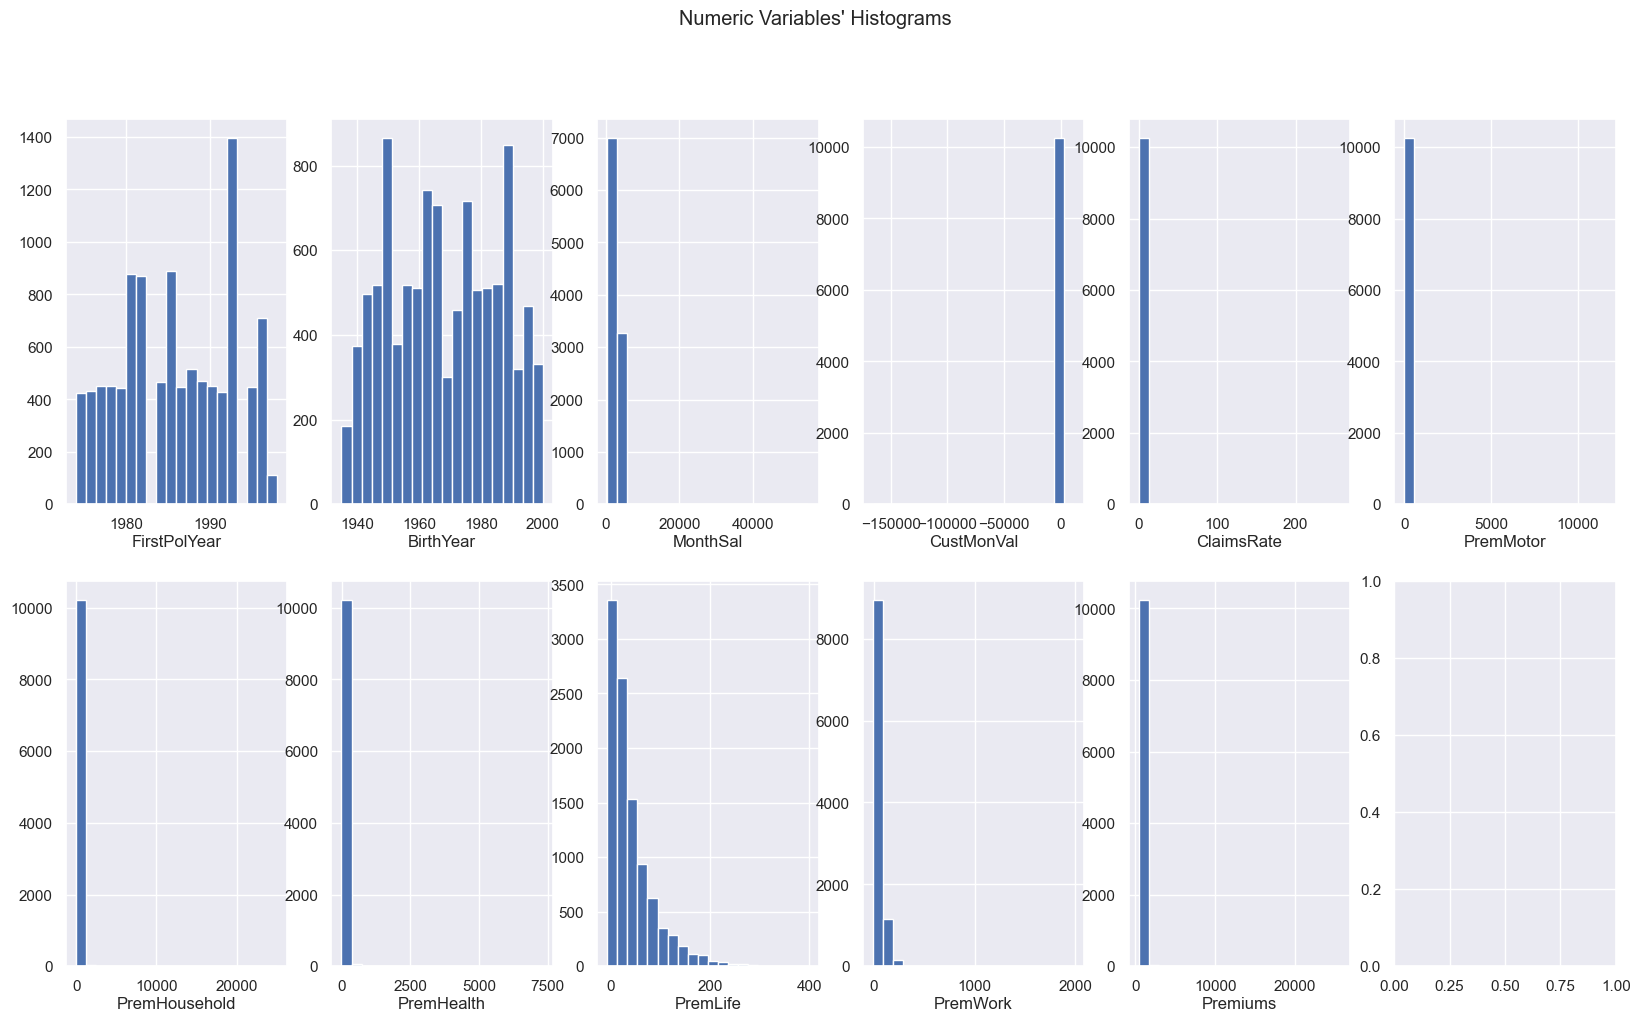

In [247]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11)) #defining the layout

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat],bins=20)
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


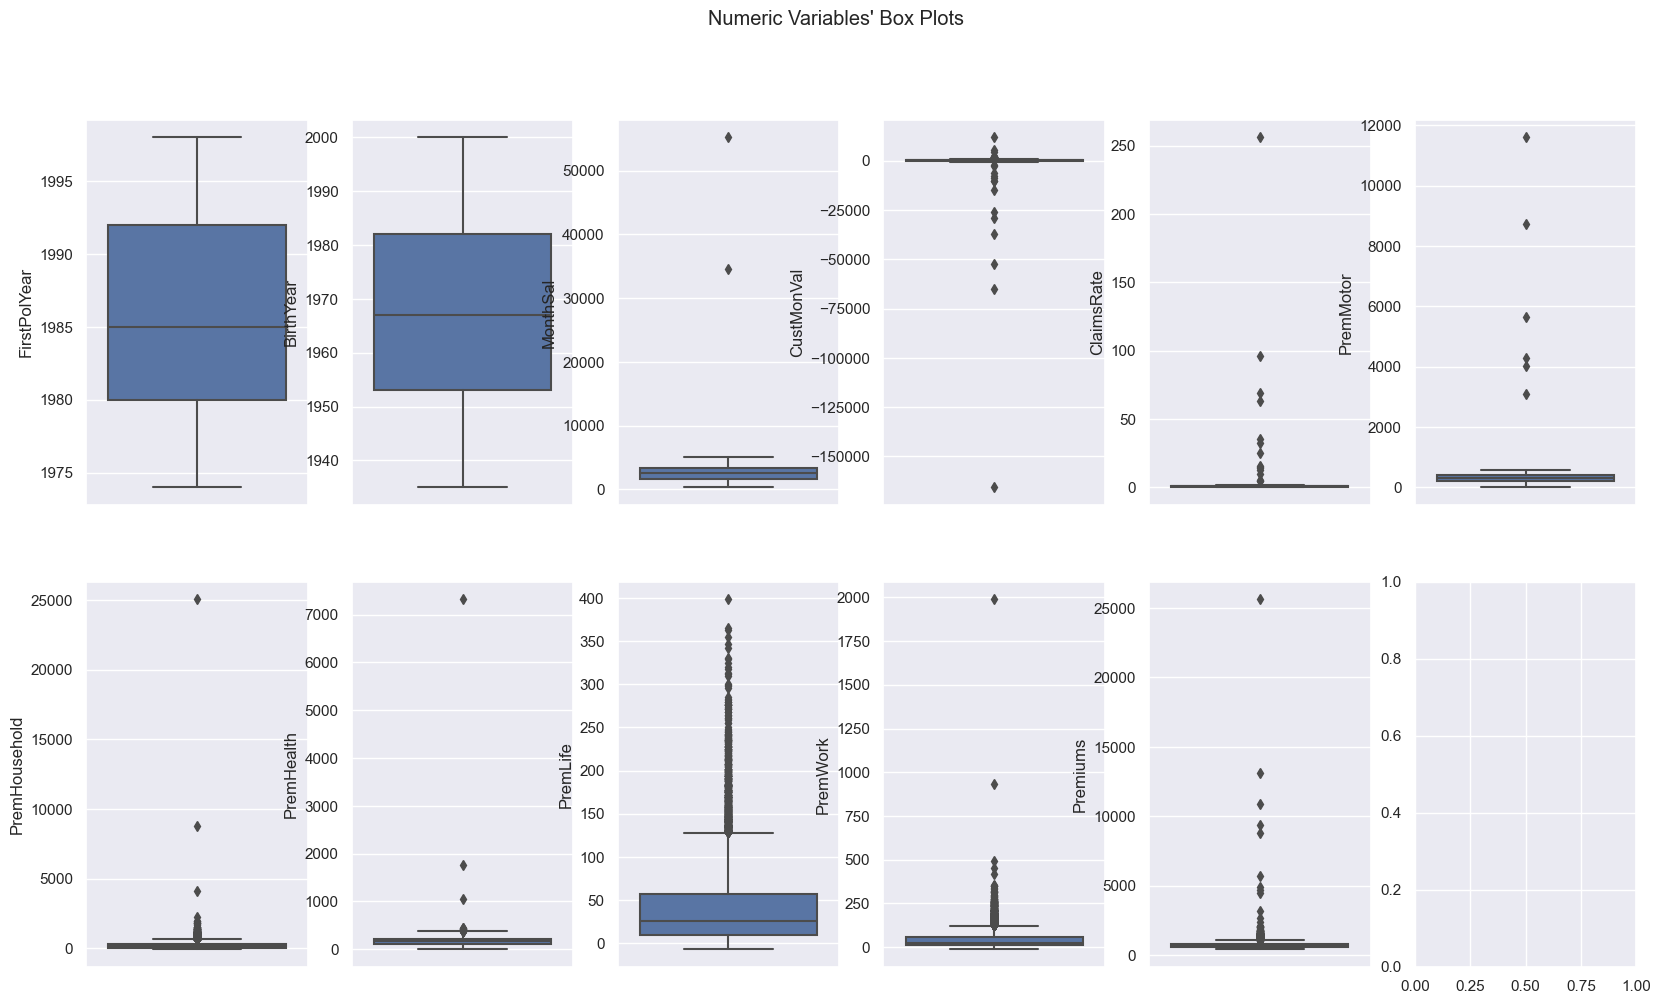

In [248]:
# All Categorical Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(),metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=df[feat],ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [249]:
# All Categorical Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11)) #defining the layout

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat],bins=20)
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Categorical Variables' Histograms"

plt.suptitle(title)
plt.show()

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting


In [250]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11)) #defining the layout

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    ax.hist(df[feat],bins=4)
    ax.set_title(feat, y=-0.01)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting


top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


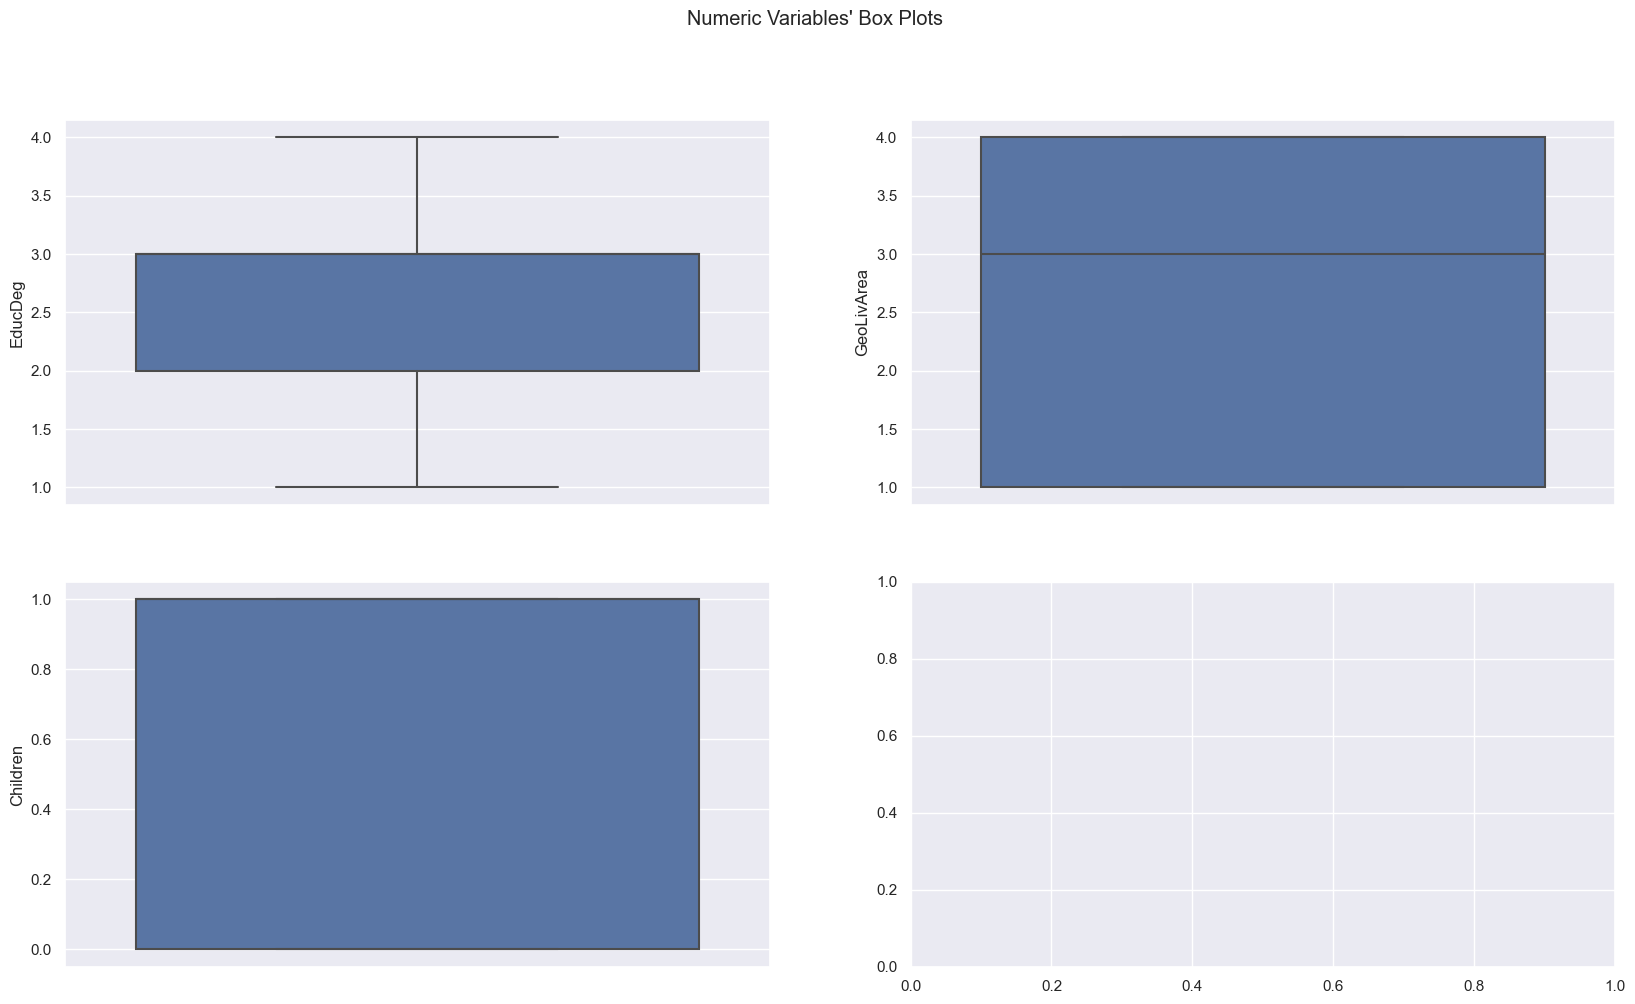

In [251]:
# All Categorical Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(non_metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), non_metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=df[feat],ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [345]:
#1st method for outlier detection 
filters1 = (
    (df['MonthSal']<=30000)
    &
    (df['CustMonVal']>=-2000)
    &
    (df['CustMonVal']<=1500)
    &
    (df['PremMotor']<=3000)
    &
    (df['PremHousehold']<=1750)
    &
    (df['PremHealth']<=2000)
    &
    (df['PremLife']<=300)
    &
    (df['PremWork']<= 400)
    &
    (df['ClaimsRate']<= 4)
    )

df_1 = df[filters1]
print('Percentage of data kept after removing outliers:', np.round(df_1.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9928


In [346]:
df

FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
CustID                                                                          
1.0              1985       1981    2177.0      380.97        0.39     375.85   
2.0              1981       1995     677.0     -131.13        1.12      77.46   
3.0              1991       1970    2277.0      504.67        0.28     206.15   
4.0              1990       1981    1099.0      -16.99        0.99     182.48   
5.0              1985       1973    1763.0       35.23        0.90     338.62   
...               ...        ...       ...         ...         ...        ...   
10292.0          1984       1949    3188.0       -0.11        0.96     393.74   
10293.0          1977       1951    2431.0     1405.60        0.00     133.58   
10294.0          1993       1976    2918.0      524.10        0.21     403.63   
10295.0          1981       1977    1971.0      250.05        0.65     188.59   
10296.0          1990       1981    2815.0      463.75        0.27     414.08   

         PremHousehold  PremHealth  PremLife  PremWork  EducDeg  GeoLivArea  \
CustID                                                                        
1.0              79.45      146.36     47.01     16.89      2.0           1   
2.0             416.20      116.69    194.48    106.13      2.0           4   
3.0             224.50      124.58     86.35     99.02      1.0           3   
4.0              43.35      311.17     35.34     28.34      3.0           4   
5.0              47.80      182.59     18.78     41.45      3.0           4   
...                ...         ...       ...       ...      ...         ...   
10292.0          49.45      173.81      9.78     14.78      4.0           2   
10293.0        1035.75      143.25     12.89    105.13      1.0           3   
10294.0         132.80      142.25     12.67      4.89      3.0           1   
10295.0         211.15      198.37     63.90    112.91      1.0           2   
10296.0          94.45      141.25      6.89     12.89      4.0           1   

         Children  Premiums  
CustID                       
1.0             1    665.56  
2.0             1    910.96  
3.0             0    740.60  
4.0             1    600.68  
5.0             1    629.24  
...           ...       ...  
10292.0         0    641.56  
10293.0         0   1430.60  
10294.0         1    696.24  
10295.0         1    774.92  
10296.0         1    669.56  

[10278 rows x 14 columns]

In [347]:
#IQR
q25 = df.quantile(.25)
q75 = df.quantile(.75)
iqr = (q75 - q25)

upper_lim = q75 + 1.5 * iqr
lower_lim = q25 - 1.5 * iqr

filters2 = []
for metric in metric_features:
    llim = lower_lim[metric]
    ulim = upper_lim[metric]
    filters2.append(df[metric].between(llim, ulim, inclusive=True))

filters2 = pd.Series(np.all(filters2, 0),index=df[metric_features].index)
df_2 = df[filters2]
print('Percentage of data kept after removing outliers:', np.round(df_2.shape[0]  / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.8532


In [348]:
#Local Outlier Factor Algorithm (LOC)
df_LOF = df[metric_features].copy()

outF = LocalOutlierFactor(n_neighbors=20)
pred = outF.fit_predict(df_LOF)
df_LOF['LOF Outliers'] = pred

print('Percentage of data kept after removing outliers:', np.round(len(df_LOF[df_LOF['LOF Outliers']==1]) / df_original.shape[0],4))
print(df_LOF['LOF Outliers'])

Percentage of data kept after removing outliers: 0.9888
CustID
1.0        1
2.0        1
3.0        1
4.0        1
5.0        1
          ..
10292.0    1
10293.0   -1
10294.0    1
10295.0    1
10296.0    1
Name: LOF Outliers, Length: 10278, dtype: int32


In [349]:
df_LOF['LOF Outliers'] = df_LOF['LOF Outliers'].replace({1:'True', -1:'False'})

In [350]:
df_LOF['LOF Outliers']

CustID
1.0         True
2.0         True
3.0         True
4.0         True
5.0         True
           ...  
10292.0     True
10293.0    False
10294.0     True
10295.0     True
10296.0     True
Name: LOF Outliers, Length: 10278, dtype: object

In [351]:
filters2

CustID
1.0         True
2.0        False
3.0         True
4.0         True
5.0         True
           ...  
10292.0     True
10293.0    False
10294.0     True
10295.0     True
10296.0     True
Length: 10278, dtype: bool

In [352]:
# Get a dataframe of all the outliers
df_outliers = df[(~filters1)]

In [353]:
df3 = df[(filters2 | filters1)]
print('Percentage of data kept after removing outliers:', np.round(df3.shape[0] / df_original.shape[0], 4))

Percentage of data kept after removing outliers: 0.9928


In [354]:
df3

FirstPolYear  BirthYear  MonthSal  CustMonVal  ClaimsRate  PremMotor  \
CustID                                                                          
1.0              1985       1981    2177.0      380.97        0.39     375.85   
2.0              1981       1995     677.0     -131.13        1.12      77.46   
3.0              1991       1970    2277.0      504.67        0.28     206.15   
4.0              1990       1981    1099.0      -16.99        0.99     182.48   
5.0              1985       1973    1763.0       35.23        0.90     338.62   
...               ...        ...       ...         ...         ...        ...   
10292.0          1984       1949    3188.0       -0.11        0.96     393.74   
10293.0          1977       1951    2431.0     1405.60        0.00     133.58   
10294.0          1993       1976    2918.0      524.10        0.21     403.63   
10295.0          1981       1977    1971.0      250.05        0.65     188.59   
10296.0          1990       1981    2815.0      463.75        0.27     414.08   

         PremHousehold  PremHealth  PremLife  PremWork  EducDeg  GeoLivArea  \
CustID                                                                        
1.0              79.45      146.36     47.01     16.89      2.0           1   
2.0             416.20      116.69    194.48    106.13      2.0           4   
3.0             224.50      124.58     86.35     99.02      1.0           3   
4.0              43.35      311.17     35.34     28.34      3.0           4   
5.0              47.80      182.59     18.78     41.45      3.0           4   
...                ...         ...       ...       ...      ...         ...   
10292.0          49.45      173.81      9.78     14.78      4.0           2   
10293.0        1035.75      143.25     12.89    105.13      1.0           3   
10294.0         132.80      142.25     12.67      4.89      3.0           1   
10295.0         211.15      198.37     63.90    112.91      1.0           2   
10296.0          94.45      141.25      6.89     12.89      4.0           1   

         Children  Premiums  
CustID                       
1.0             1    665.56  
2.0             1    910.96  
3.0             0    740.60  
4.0             1    600.68  
5.0             1    629.24  
...           ...       ...  
10292.0         0    641.56  
10293.0         0   1430.60  
10294.0         1    696.24  
10295.0         1    774.92  
10296.0         1    669.56  

[10222 rows x 14 columns]

top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


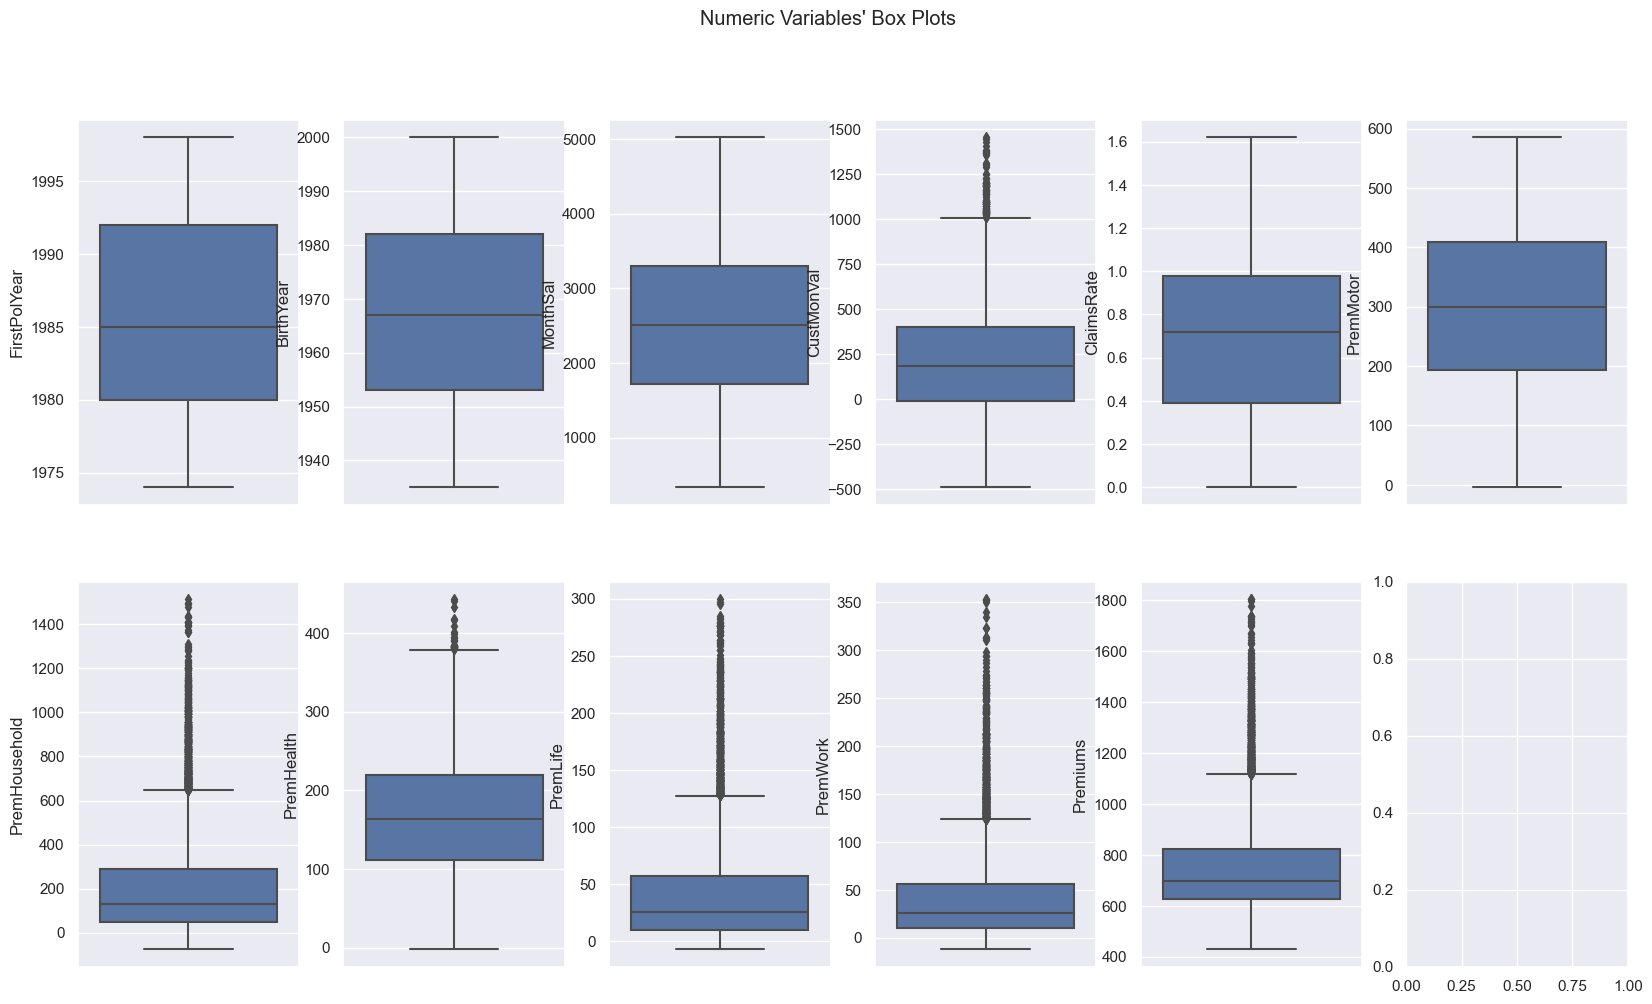

In [262]:
# All Categorical Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(),metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=df_1[feat],ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


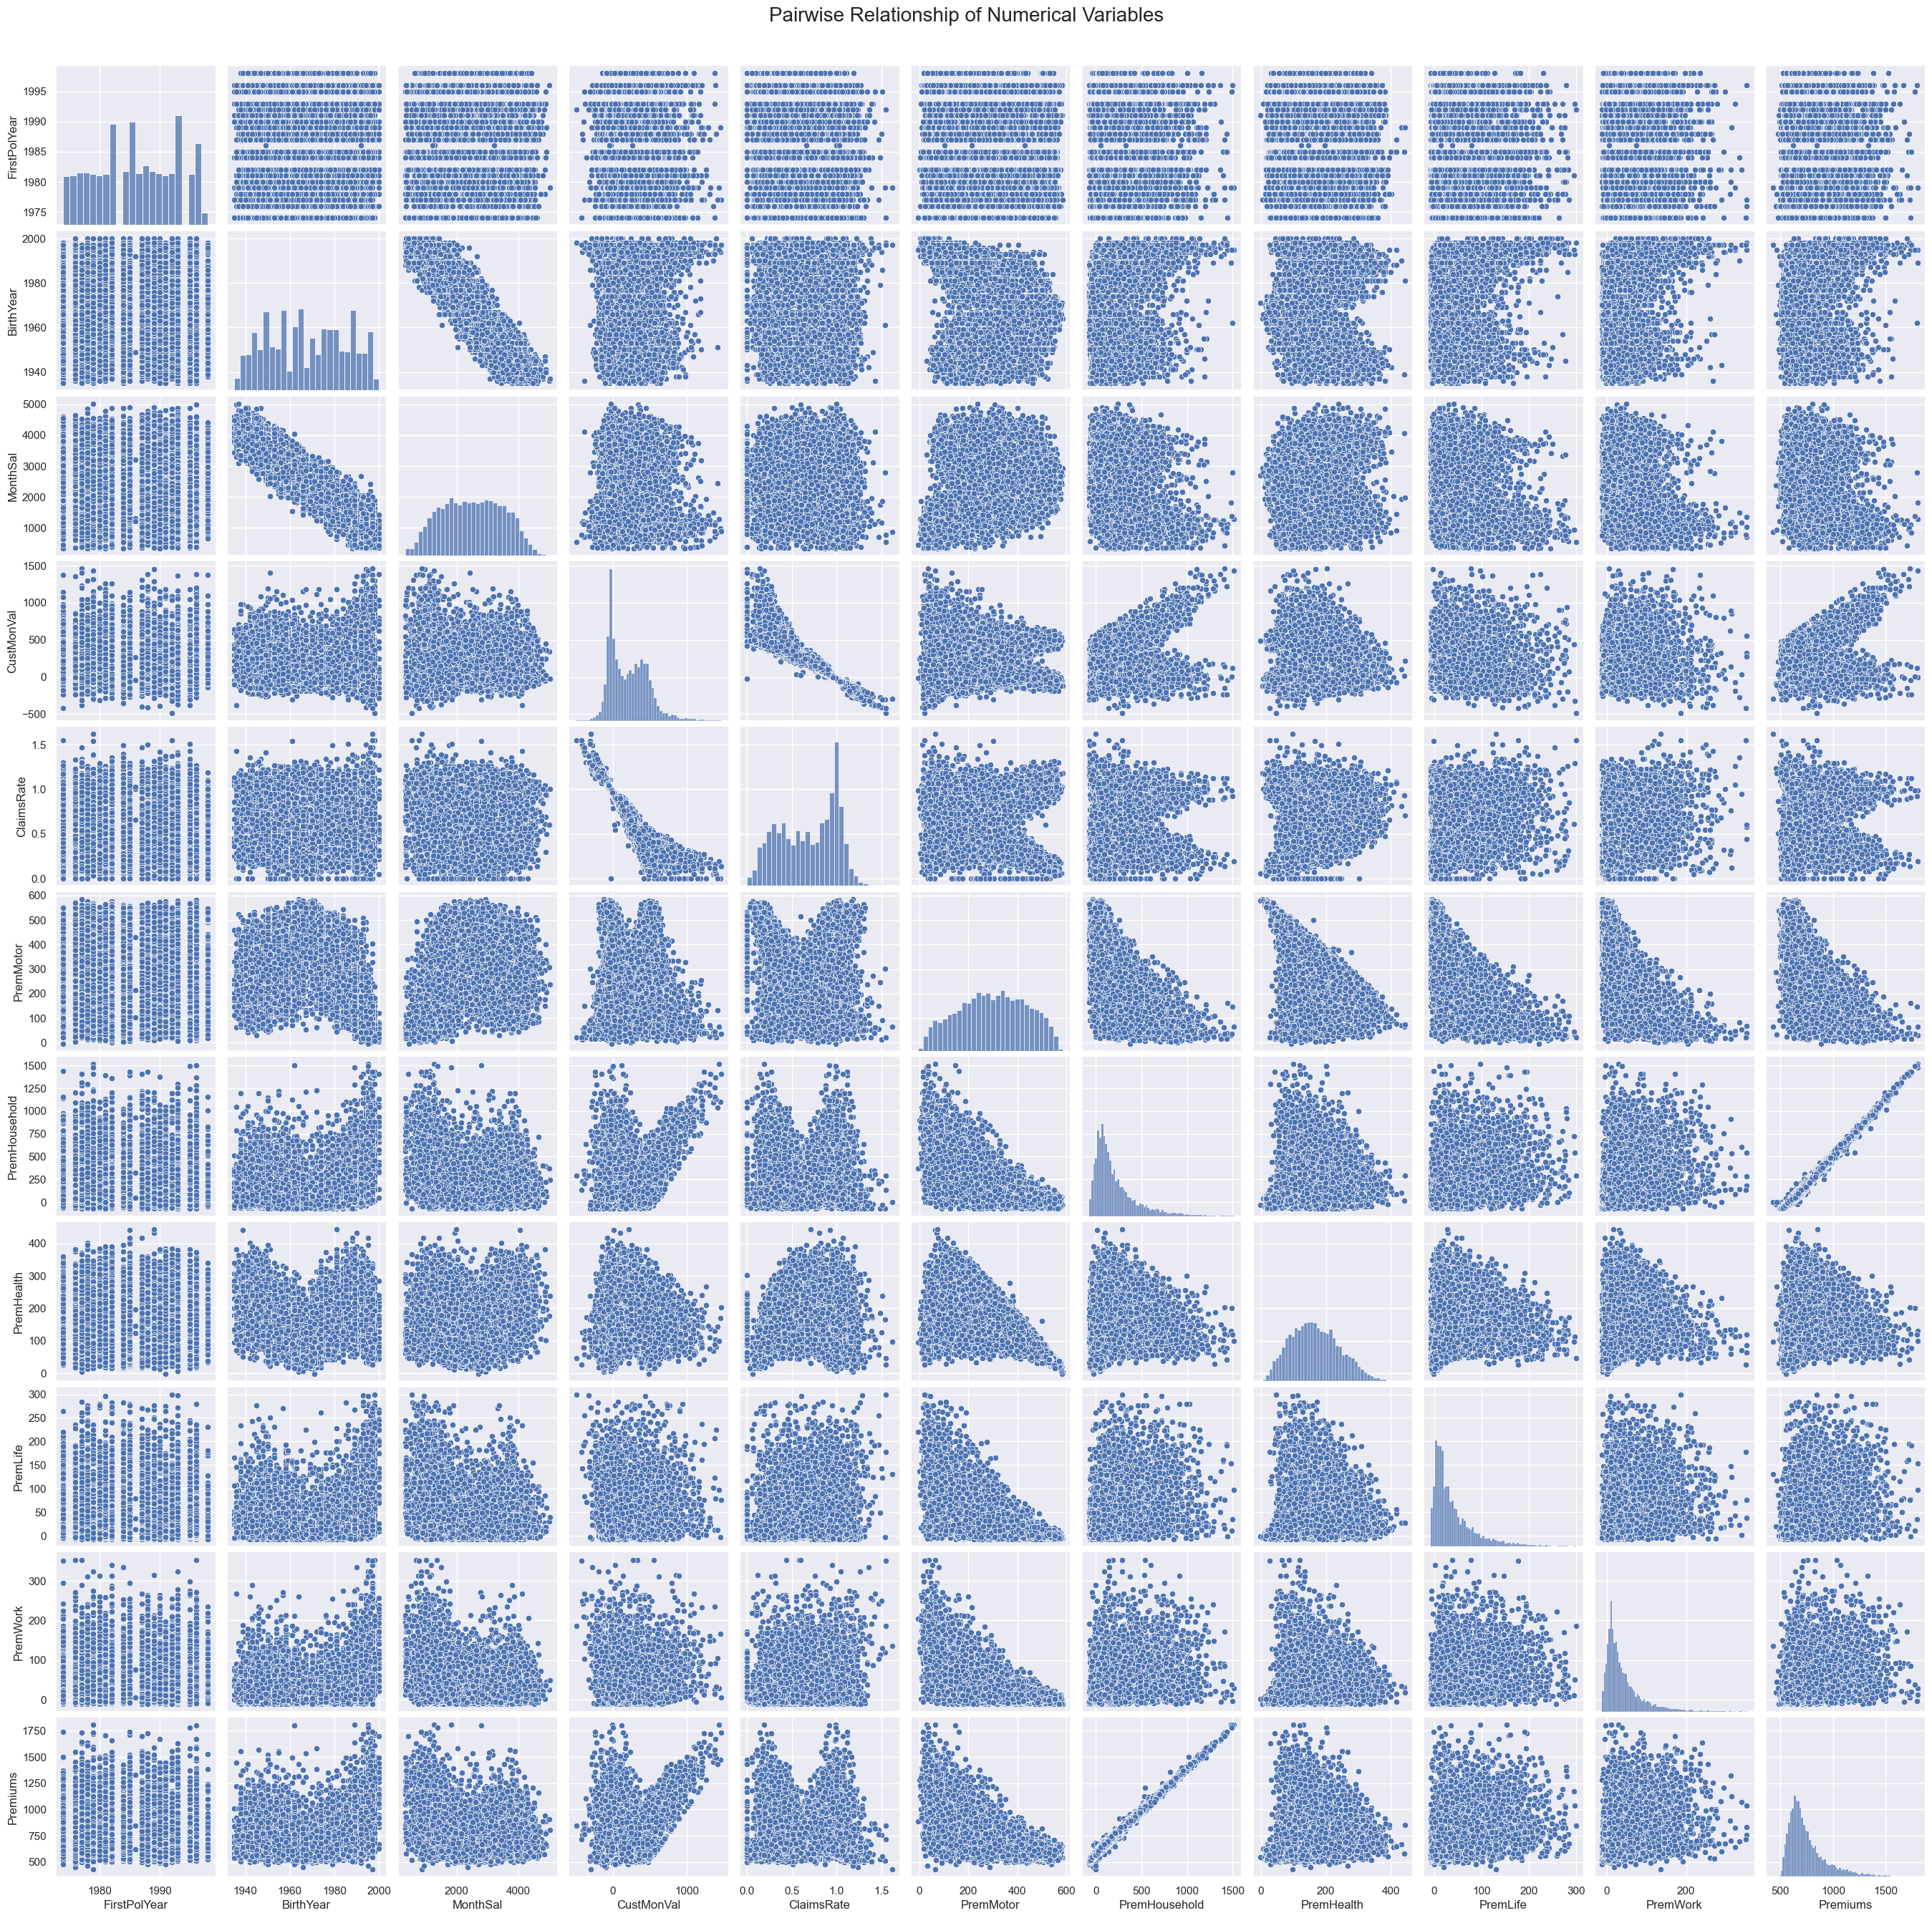

In [263]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df_1[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

plt.show()

top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


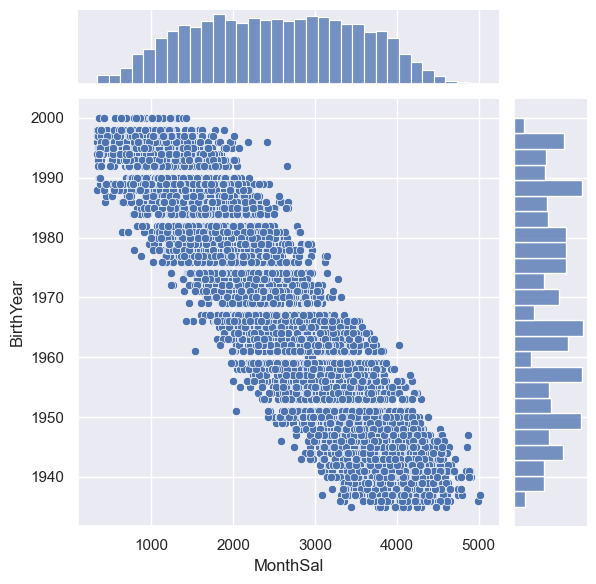

In [264]:
# making a joint plot with default formatting
sns.jointplot(data=df_1, x="MonthSal", y="BirthYear")
plt.show()

locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001EB08BF0D90>
Using auto colorbar locator <matplotlib.colorbar._ColorbarAutoLocator object at 0x000001EB08BF0D90> on colorbar
Setting pcolormesh
top of axes not in the figure, so title not moved


<AxesSubplot:>

top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


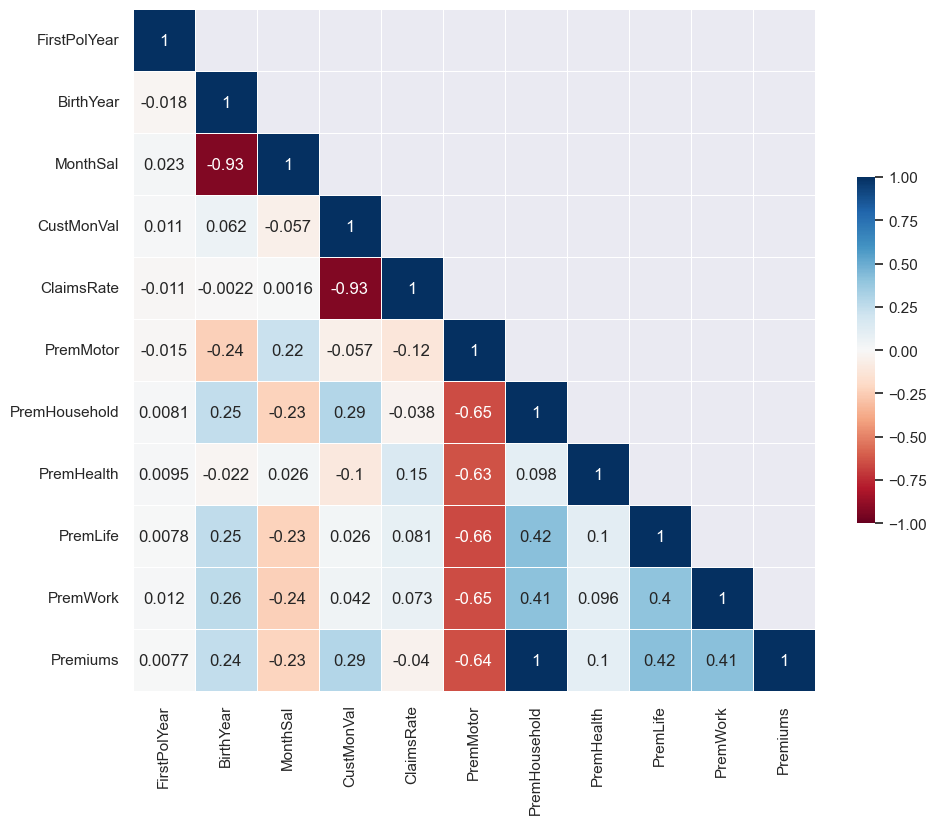

In [265]:
# Compute the correlation matrix - Pearson
corr = df3[metric_features].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.diag_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})


# Data Preprocessing

<hr>
<a class="anchor" id="transformation">
    
# 6. Tranformation of Variables / Feature Engineering
    
</a>

In [355]:
df3['Negative']=df3.iloc[:,5:10][df3<0].sum(1)

#df_insurance['PayedAdvance_Ratio']=abs(df_insurance['negative'])/df_insurance['Total_Premiums']
df3['Cancelled']=np.where(df3['Negative']<0, 1, 0)

df3['Negative']=abs(df3['Negative'])


In [356]:
df_outliers['Negative']=df_outliers.iloc[:,5:10][df3<0].sum(1)

#df_insurance['PayedAdvance_Ratio']=abs(df_insurance['negative'])/df_insurance['Total_Premiums']
df_outliers['Cancelled']=np.where(df_outliers['Negative']<0, 1, 0)

df_outliers['Negative']=abs(df_outliers['Negative'])


In [357]:
#'YearsAsClients'
df3['YearsAsClients'] = df3['FirstPolYear']
df3['YearsAsClients'] = 2016 - df3['FirstPolYear']

#'Age'
df3['Age'] = df3['BirthYear']
df3['Age'] = 2016 - df3['BirthYear']

#'YearSalary'
df3['YearSalary'] = df3['MonthSal']
df3['YearSalary'] = df3['MonthSal']*12

#'Premiums'
df3['Premiums'] #we already create this variable above

#'MotorPercentageSpent'
df3['MotorPercentageSpent'] = df3['PremMotor']/df3['Premiums']

#'HouseholdPercentageSpent'
df3['HouseholdPercentageSpent'] = df3['PremHousehold']/df3['Premiums']

#'HealthPercentageSpent'
df3['HealthPercentageSpent'] = df3['PremHealth']/df3['Premiums']

#'LifePercentageSpent'
df3['LifePercentageSpent'] = df3['PremLife']/df3['Premiums']

#'WorkPercentageSpent'
df3['WorkPercentageSpent'] = df3['PremWork']/df3['Premiums']

#'SalarySpent'
df3['SalarySpent'] = df3['YearSalary']/df3['Premiums']


df3.drop(['FirstPolYear','BirthYear','MonthSal','PremMotor','PremHousehold','PremHealth','PremLife','PremWork',"Negative"], axis= 1, inplace= True)

In [358]:
#'YearsAsClients'
df_outliers['YearsAsClients'] = df_outliers['FirstPolYear']
df_outliers['YearsAsClients'] = 2016 - df_outliers['FirstPolYear']

#'Age'
df_outliers['Age'] = df_outliers['BirthYear']
df_outliers['Age'] = 2016 - df_outliers['BirthYear']

#'YearSalary'
df_outliers['YearSalary'] = df_outliers['MonthSal']
df_outliers['YearSalary'] = df_outliers['MonthSal']*12

#'Premiums'
df_outliers['Premiums'] #we already create this variable above

#'MotorPercentageSpent'
df_outliers['MotorPercentageSpent'] = df_outliers['PremMotor']/df_outliers['Premiums']

#'HouseholdPercentageSpent'
df_outliers['HouseholdPercentageSpent'] = df_outliers['PremHousehold']/df_outliers['Premiums']

#'HealthPercentageSpent'
df_outliers['HealthPercentageSpent'] = df_outliers['PremHealth']/df_outliers['Premiums']

#'LifePercentageSpent'
df_outliers['LifePercentageSpent'] = df_outliers['PremLife']/df_outliers['Premiums']

#'WorkPercentageSpent'
df_outliers['WorkPercentageSpent'] = df_outliers['PremWork']/df_outliers['Premiums']

#'SalarySpent'
df_outliers['SalarySpent'] = df_outliers['YearSalary']/df_outliers['Premiums']


df_outliers.drop(['FirstPolYear','BirthYear','MonthSal','PremMotor','PremHousehold','PremHealth','PremLife','PremWork',"Negative"], axis= 1, inplace= True)

In [359]:
non_metric_features = ["EducDeg", "GeoLivArea","Children","Cancelled"]
metric_features = df3.columns.drop(non_metric_features).to_list()

<hr>
<a class="anchor" id="correlations">
    
# 7. Correlations
    
</a>

In [1]:
# Compute the correlation matrix - Pearson
corr = df3[metric_features].corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
mask[np.diag_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = 'RdBu', vmax = 1, vmin=-1, center = 0,
            square = True, annot = True, linewidths = .5, cbar_kws = {"shrink": .5})

NameError: name 'df3' is not defined

In [361]:
df3.var()

CustMonVal                  6.475686e+04
ClaimsRate                  1.014937e-01
EducDeg                     6.282190e-01
GeoLivArea                  1.604303e+00
Children                    2.068041e-01
Premiums                    3.488046e+04
Cancelled                   1.702499e-01
YearsAsClients              4.322889e+01
Age                         2.984361e+02
YearSalary                  1.386765e+08
MotorPercentageSpent        6.194696e-02
HouseholdPercentageSpent    3.890532e-02
HealthPercentageSpent       1.180558e-02
LifePercentageSpent         3.073210e-03
WorkPercentageSpent         3.154135e-03
SalarySpent                 3.562986e+02
dtype: float64

In [362]:
df3['ClaimsRate'].value_counts()

1.00    454
1.01    211
1.02    201
0.99    195
1.03    195
       ... 
1.41      1
1.54      1
1.50      1
1.40      1
1.51      1
Name: ClaimsRate, Length: 149, dtype: int64

<hr>
<a class="anchor" id="selection">
    
# 8. Feature Engineering and Selection
    
</a>

In [363]:
#Looking at the correlation matrix
# Relevance / Redundancy 
df3.drop(['YearsAsClients','Premiums','CustMonVal','YearSalary'], axis= 1, inplace= True) 
df_outliers.drop(['YearsAsClients','Premiums','CustMonVal','YearSalary'], axis= 1, inplace= True) 

In [364]:
non_metric_features = ["EducDeg", "GeoLivArea","Children","Cancelled"]
metric_features = df3.columns.drop(non_metric_features).to_list()

<AxesSubplot:xlabel='GeoLivArea', ylabel='WorkPercentageSpent'>

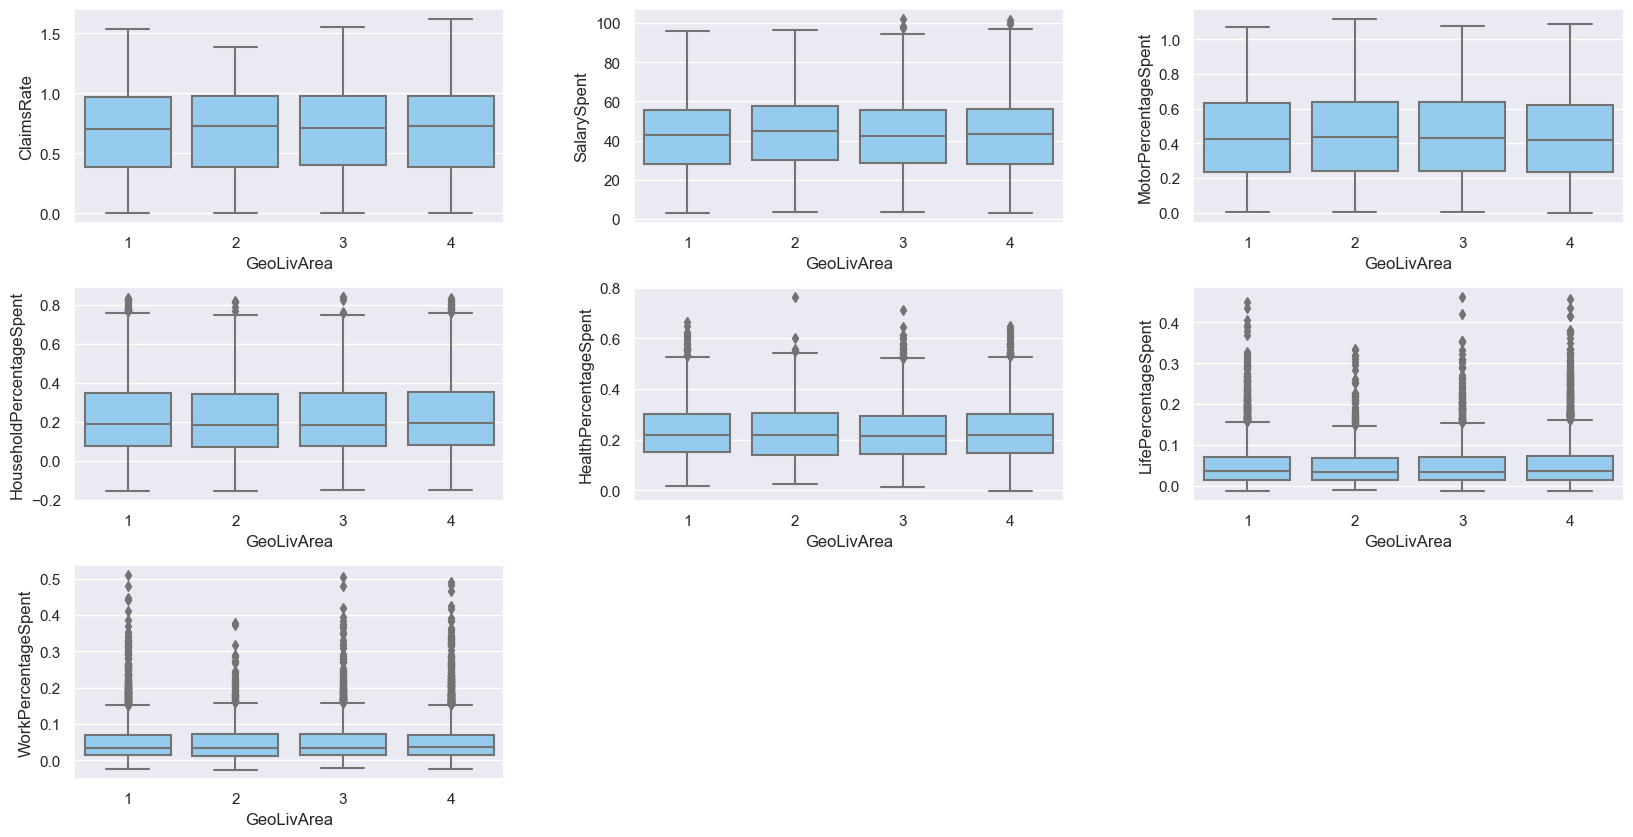

In [365]:
fig = plt.figure(figsize=(3,3))
fig.set_size_inches(20,10)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

gs = fig.add_gridspec(nrows=3,ncols=3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])

sns.boxplot(x="GeoLivArea", y="ClaimsRate", data=df3, ax=ax1, color='#87CEFA')
sns.boxplot(x="GeoLivArea", y="SalarySpent", data=df3, ax=ax2, color='#87CEFA')
sns.boxplot(x="GeoLivArea", y="MotorPercentageSpent", data=df3, ax=ax3, color='#87CEFA')
sns.boxplot(x="GeoLivArea", y="HouseholdPercentageSpent", data=df3, ax=ax4, color='#87CEFA')
sns.boxplot(x="GeoLivArea", y="HealthPercentageSpent", data=df3, ax=ax5, color='#87CEFA')
sns.boxplot(x="GeoLivArea", y="LifePercentageSpent", data=df3, ax=ax6, color='#87CEFA')
sns.boxplot(x="GeoLivArea", y="WorkPercentageSpent", data=df3, ax=ax7, color='#87CEFA')


<AxesSubplot:xlabel='EducDeg', ylabel='WorkPercentageSpent'>

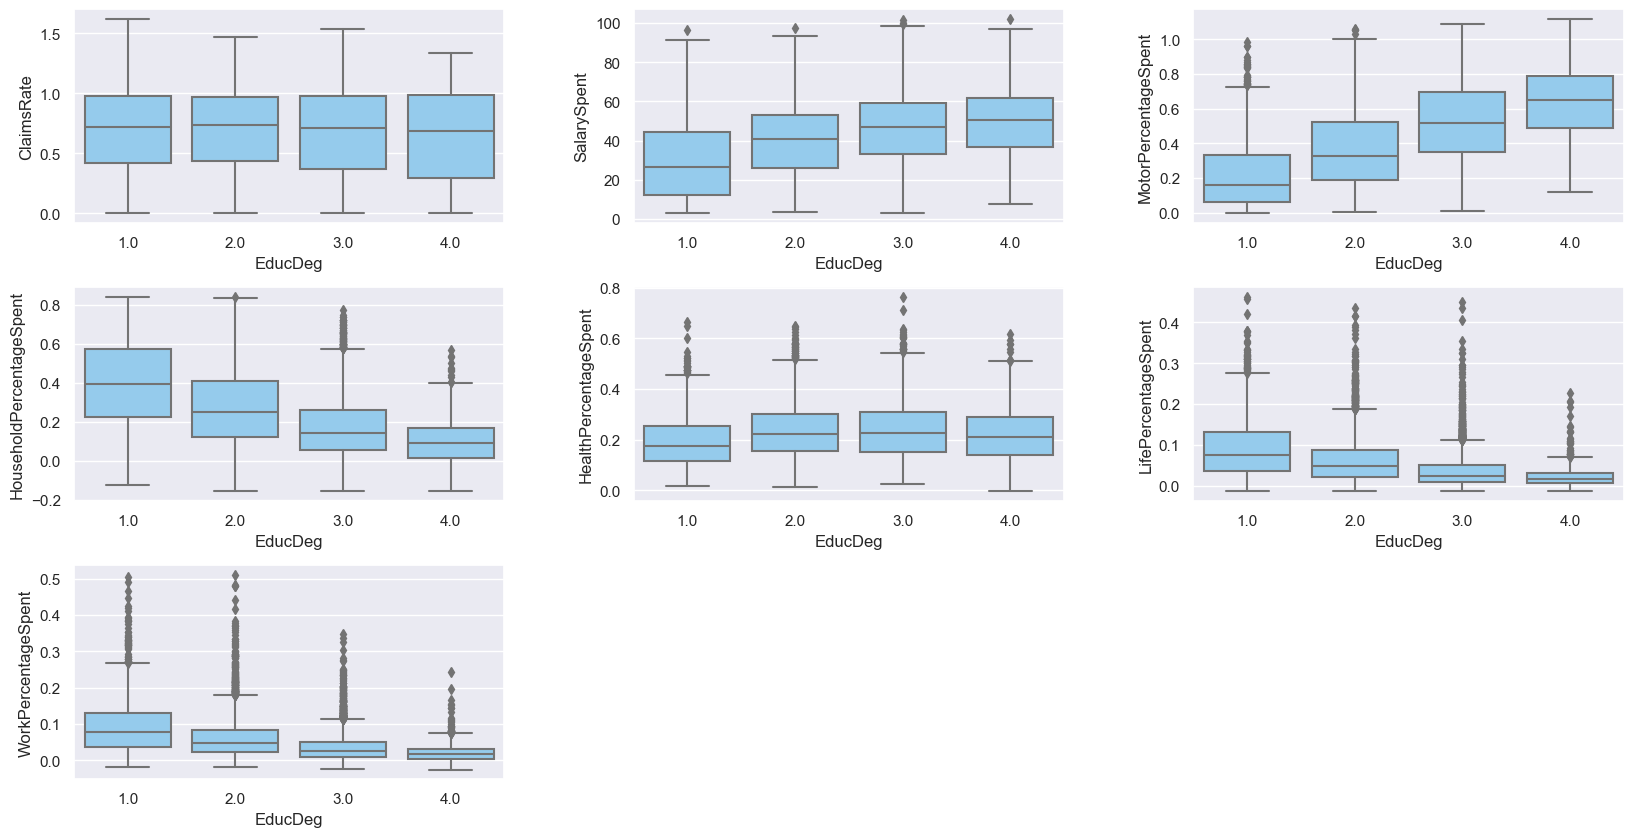

In [366]:
fig = plt.figure(figsize=(3,3))
fig.set_size_inches(20,10)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

gs = fig.add_gridspec(nrows=3,ncols=3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])

sns.boxplot(x="EducDeg", y="ClaimsRate", data=df3, ax=ax1, color='#87CEFA')
sns.boxplot(x="EducDeg", y="SalarySpent", data=df3, ax=ax2, color='#87CEFA')
sns.boxplot(x="EducDeg", y="MotorPercentageSpent", data=df3, ax=ax3, color='#87CEFA')
sns.boxplot(x="EducDeg", y="HouseholdPercentageSpent", data=df3, ax=ax4, color='#87CEFA')
sns.boxplot(x="EducDeg", y="HealthPercentageSpent", data=df3, ax=ax5, color='#87CEFA')
sns.boxplot(x="EducDeg", y="LifePercentageSpent", data=df3, ax=ax6, color='#87CEFA')
sns.boxplot(x="EducDeg", y="WorkPercentageSpent", data=df3, ax=ax7, color='#87CEFA')



<AxesSubplot:xlabel='Children', ylabel='WorkPercentageSpent'>

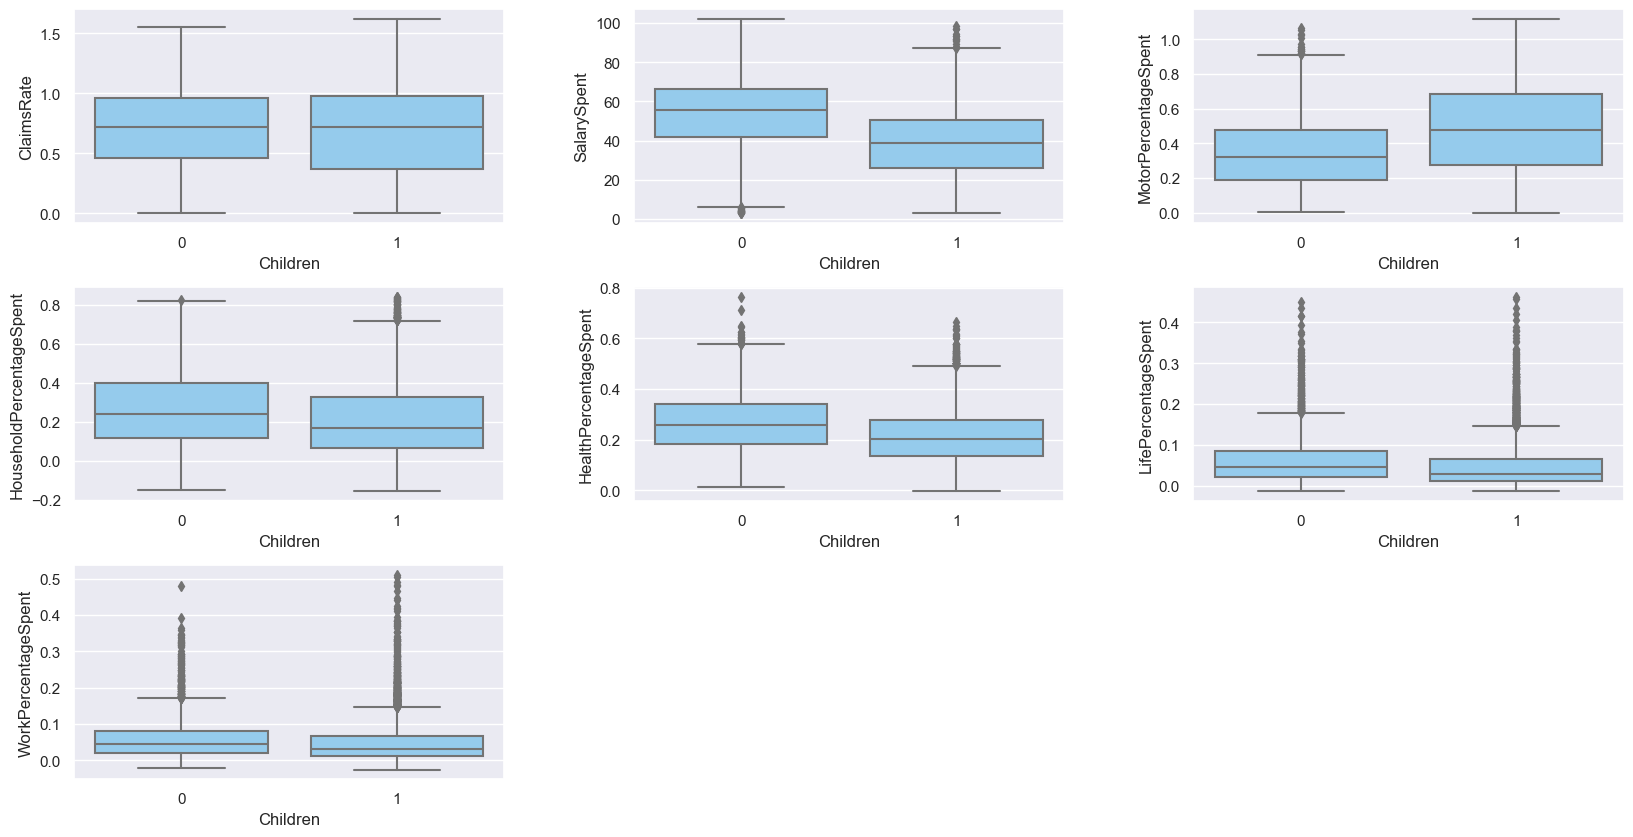

In [367]:
fig = plt.figure(figsize=(3,3))
fig.set_size_inches(20,10)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

gs = fig.add_gridspec(nrows=3,ncols=3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])


sns.boxplot(x="Children", y="ClaimsRate", data=df3, ax=ax1, color='#87CEFA')
sns.boxplot(x="Children", y="SalarySpent", data=df3, ax=ax2, color='#87CEFA')
sns.boxplot(x="Children", y="MotorPercentageSpent", data=df3, ax=ax3, color='#87CEFA')
sns.boxplot(x="Children", y="HouseholdPercentageSpent", data=df3, ax=ax4, color='#87CEFA')
sns.boxplot(x="Children", y="HealthPercentageSpent", data=df3, ax=ax5, color='#87CEFA')
sns.boxplot(x="Children", y="LifePercentageSpent", data=df3, ax=ax6, color='#87CEFA')
sns.boxplot(x="Children", y="WorkPercentageSpent", data=df3, ax=ax7, color='#87CEFA')


In [368]:
fig = plt.figure(figsize=(3,3))
fig.set_size_inches(20,10)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

gs = fig.add_gridspec(nrows=3,ncols=3)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[0,2])
ax4 = fig.add_subplot(gs[1,0])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[1,2])
ax7 = fig.add_subplot(gs[2,0])

sns.boxplot(x="Cancelled", y="ClaimsRate", data=df3, ax=ax1, color='#87CEFA')
sns.boxplot(x="Cancelled", y="SalarySpent", data=df3, ax=ax2, color='#87CEFA')
sns.boxplot(x="Cancelled", y="MotorPercentageSpent", data=df3, ax=ax3, color='#87CEFA')
sns.boxplot(x="Cancelled", y="HouseholdPercentageSpent", data=df3, ax=ax4, color='#87CEFA')
sns.boxplot(x="Cancelled", y="HealthPercentageSpent", data=df3, ax=ax5, color='#87CEFA')
sns.boxplot(x="Cancelled", y="LifePercentageSpent", data=df3, ax=ax6, color='#87CEFA')
sns.boxplot(x="Cancelled", y="WorkPercentageSpent", data=df3, ax=ax7, color='#87CEFA')



<AxesSubplot:xlabel='Cancelled', ylabel='WorkPercentageSpent'>

In [369]:
#Regarding non-metric features, GeoLivArea seems to be the only one to have constant values, regardless of values 
df3.drop('GeoLivArea',axis=1,inplace=True)
df_outliers.drop('GeoLivArea',axis=1,inplace=True)
non_metric_features.remove('GeoLivArea')

#df_outliers_ohc.drop('GeoLivArea_2',axis=1,inplace=True)
#df_outliers_ohc.drop('GeoLivArea_3',axis=1,inplace=True)
#df_outliers_ohc.drop('GeoLivArea_4',axis=1,inplace=True)

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manu

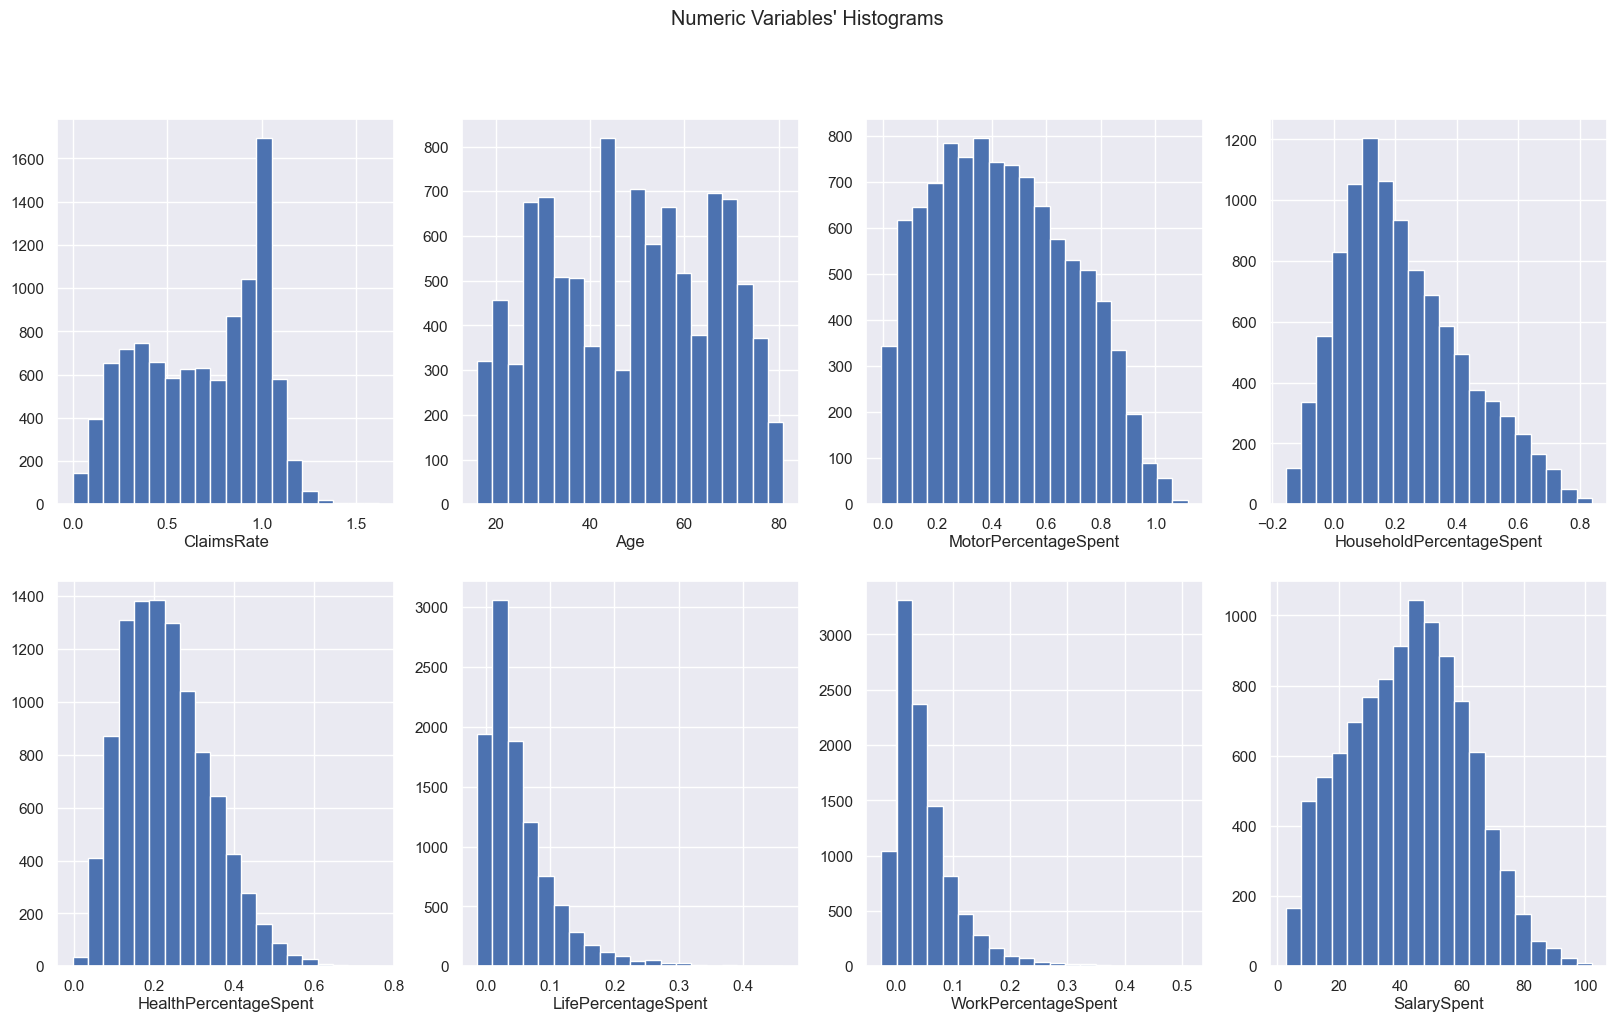

In [370]:
# All Numeric Variables' Histograms in one figure
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11)) #defining the layout

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    ax.hist(df3[feat],bins=20)
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved
top of axes not in the figure, so title not moved


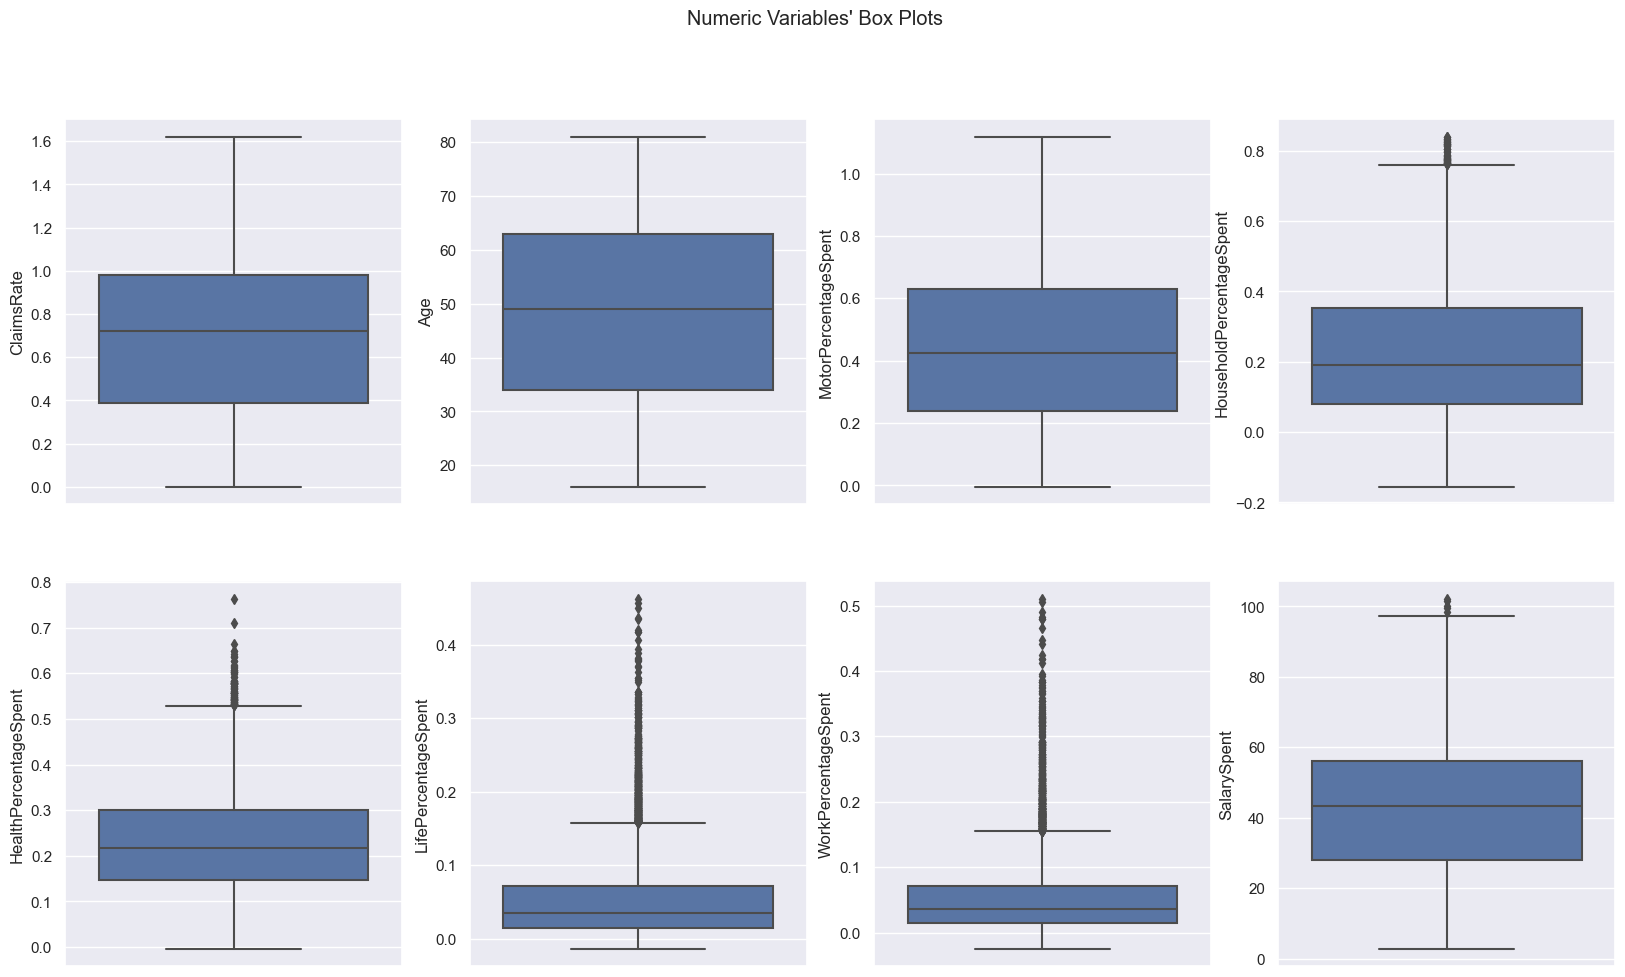

In [371]:
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(),metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(y=df3[feat],ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="encoding">
    
# 9. Data Normalization and Encoding
    
</a>

In [372]:
dfRobust= df3.copy()

scaler = RobustScaler()
df3_scaled = scaler.fit_transform(dfRobust[metric_features])
df3_scaled
df3[metric_features] = df3_scaled


In [373]:
dfOneHotEncoder = dfRobust.copy()
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat =  ohc.fit_transform(dfOneHotEncoder[non_metric_features])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(columns=ohc_feat_names, data=ohc_feat, index=dfOneHotEncoder.index)
ohc_df

EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  Children_1  Cancelled_1
CustID                                                                 
1.0              1.0          0.0          0.0         1.0          0.0
2.0              1.0          0.0          0.0         1.0          0.0
3.0              0.0          0.0          0.0         0.0          0.0
4.0              0.0          1.0          0.0         1.0          0.0
5.0              0.0          1.0          0.0         1.0          0.0
...              ...          ...          ...         ...          ...
10292.0          0.0          0.0          1.0         0.0          0.0
10293.0          0.0          0.0          0.0         0.0          0.0
10294.0          0.0          1.0          0.0         1.0          0.0
10295.0          0.0          0.0          0.0         1.0          0.0
10296.0          0.0          0.0          1.0         1.0          0.0

[10222 rows x 5 columns]

In [374]:
# Reassigning df to contain ohc variables
df = pd.concat([dfOneHotEncoder.drop(columns=non_metric_features), ohc_df], axis=1)
#remove non metric features and put the ohc of these features
df.head()

ClaimsRate  Age  MotorPercentageSpent  HouseholdPercentageSpent  \
CustID                                                                    
1.0           0.39   35              0.564712                  0.119373   
2.0           1.12   21              0.085031                  0.456881   
3.0           0.28   46              0.278355                  0.303133   
4.0           0.99   35              0.303789                  0.072168   
5.0           0.90   43              0.538141                  0.075965   

        HealthPercentageSpent  LifePercentageSpent  WorkPercentageSpent  \
CustID                                                                    
1.0                  0.219905             0.070632             0.025377   
2.0                  0.128096             0.213489             0.116503   
3.0                  0.168215             0.116595             0.133702   
4.0                  0.518030             0.058833             0.047180   
5.0                  0.290175             0.029846             0.065873   

        SalarySpent  EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  Children_1  \
CustID                                                                   
1.0       39.251157          1.0          0.0          0.0         1.0   
2.0        8.918064          1.0          0.0          0.0         1.0   
3.0       36.894410          0.0          0.0          0.0         0.0   
4.0       21.955118          0.0          1.0          0.0         1.0   
5.0       33.621512          0.0          1.0          0.0         1.0   

        Cancelled_1  
CustID               
1.0             0.0  
2.0             0.0  
3.0             0.0  
4.0             0.0  
5.0             0.0

In [375]:
dfRobust_outliers = df_outliers.copy()

scaler = RobustScaler()
df_outliers_scaled = scaler.fit_transform(dfRobust_outliers[metric_features])
df_outliers_scaled
df_outliers[metric_features] = df_outliers_scaled


In [376]:
df_outliers[non_metric_features]

EducDeg  Children  Cancelled
CustID                              
52.0        3.0         1          0
113.0       4.0         1          0
136.0       3.0         1          0
150.0       1.0         1          0
172.0       3.0         1          0
656.0       3.0         1          0
676.0       2.0         0          0
708.0       3.0         1          0
759.0       3.0         1          0
794.0       3.0         1          0
918.0       2.0         0          0
952.0       3.0         1          0
983.0       2.0         1          0
1026.0      3.0         1          0
1070.0      1.0         1          0
1302.0      1.0         1          0
1559.0      1.0         0          0
1746.0      1.0         1          0
1775.0      1.0         1          0
1776.0      2.0         0          0
1870.0      2.0         1          0
2044.0      1.0         0          0
2324.0      1.0         1          0
2372.0      1.0         0          0
2423.0      1.0         1          0
3162.0      1.0         1          0
3275.0      2.0         0          0
3436.0      2.0         1          0
3485.0      2.0         0          0
4374.0      1.0         1          0
4749.0      1.0         1          0
5085.0      2.0         0          0
5129.0      1.0         0          0
5212.0      2.0         0          0
5294.0      3.0         1          0
5432.0      1.0         0          0
5883.0      2.0         1          0
6087.0      1.0         1          0
6344.0      2.0         1          0
6702.0      3.0         0          0
6743.0      1.0         0          0
6756.0      2.0         1          0
6836.0      3.0         1          0
7086.0      3.0         1          0
7308.0      2.0         0          0
7905.0      3.0         1          0
7962.0      3.0         0          0
7963.0      4.0         1          0
8262.0      2.0         0          0
8367.0      1.0         1          0
8426.0      1.0         1          0
8668.0      1.0         0          0
8867.0      2.0         1          0
9184.0      1.0         1          0
9236.0      1.0         1          0
9649.0      3.0         0          0

In [377]:
dfRobust_outliers

ClaimsRate  EducDeg  Children  Cancelled  Age  MotorPercentageSpent  \
CustID                                                                        
52.0         25.36      3.0         1          0   50              0.924444   
113.0        15.65      4.0         1          0   37              0.873401   
136.0        14.80      3.0         1          0   28              0.403681   
150.0         0.63      1.0         1          0   22              0.085193   
172.0       256.20      3.0         1          0   27              0.582435   
656.0        96.00      3.0         1          0   53              0.600908   
676.0        63.00      2.0         0          0   79              0.233848   
708.0        35.00      3.0         1          0   26              0.206560   
759.0        12.60      3.0         1          0   24              0.222477   
794.0        13.90      3.0         1          0   34              0.210292   
918.0        32.30      2.0         0          0   65              0.162558   
952.0         5.60      3.0         1          0   40              0.881464   
983.0         9.87      2.0         1          0   35              0.121381   
1026.0        4.36      3.0         1          0   77              0.604245   
1070.0        1.02      1.0         1          0   19              0.007247   
1302.0        0.45      1.0         1          0   19              0.059822   
1559.0        0.79      1.0         0          0   21              0.036952   
1746.0        0.57      1.0         1          0   18              0.014776   
1775.0        0.31      1.0         1          0   19              0.019325   
1776.0        1.42      2.0         0          0   23              0.053440   
1870.0        0.90      2.0         1          0   23              0.092547   
2044.0        0.11      1.0         0          0   20              0.034883   
2324.0        0.03      1.0         1          0   19              0.018263   
2372.0        1.45      1.0         0          0   22              0.015154   
2423.0        0.50      1.0         1          0   21              0.055849   
3162.0        1.29      1.0         1          0   19              0.034673   
3275.0        0.75      2.0         0          0   21              0.063419   
3436.0        0.99      2.0         1          0   23              0.078763   
3485.0        0.63      2.0         0          0   20              0.106947   
4374.0        0.10      1.0         1          0   23              0.025983   
4749.0        0.12      1.0         1          0   22              0.054717   
5085.0        0.14      2.0         0          0   58              0.129534   
5129.0        0.90      1.0         0          0   73              0.815908   
5212.0        0.99      2.0         0          0   73              0.802329   
5294.0        0.09      3.0         1          0   53              0.885939   
5432.0        1.14      1.0         0          0   16              0.047525   
5883.0        0.79      2.0         1          0   60              0.396497   
6087.0        0.91      1.0         1          0   19              0.022477   
6344.0        0.99      2.0         1          0   67              0.089667   
6702.0        0.03      3.0         0          0   66              0.956164   
6743.0        0.17      1.0         0          0   19              0.016211   
6756.0        0.70      2.0         1          0   21              0.146574   
6836.0        1.00      3.0         1          0   50              0.057274   
7086.0        0.01      3.0         1          0   53              0.995198   
7308.0        0.47      2.0         0          0   23              0.049860   
7905.0        1.01      3.0         1          0   58              0.965532   
7962.0        0.83      3.0         0          0   74              0.049045   
7963.0        4.33      4.0         1          0   28              0.660824   
8262.0        0.28      2.0         0          0   26     

In [382]:
dfOneHotEncoderOutliers = dfRobust_outliers.copy()
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat =  ohc.fit_transform(dfOneHotEncoderOutliers[non_metric_features_outliers])
ohc_feat_names = ohc.get_feature_names_out()
ohc_df = pd.DataFrame(columns=ohc_feat_names, data=ohc_feat, index=dfOneHotEncoderOutliers.index)
ohc_df

EducDeg_2.0  EducDeg_3.0  EducDeg_4.0  Children_1
CustID                                                   
52.0            0.0          1.0          0.0         1.0
113.0           0.0          0.0          1.0         1.0
136.0           0.0          1.0          0.0         1.0
150.0           0.0          0.0          0.0         1.0
172.0           0.0          1.0          0.0         1.0
656.0           0.0          1.0          0.0         1.0
676.0           1.0          0.0          0.0         0.0
708.0           0.0          1.0          0.0         1.0
759.0           0.0          1.0          0.0         1.0
794.0           0.0          1.0          0.0         1.0
918.0           1.0          0.0          0.0         0.0
952.0           0.0          1.0          0.0         1.0
983.0           1.0          0.0          0.0         1.0
1026.0          0.0          1.0          0.0         1.0
1070.0          0.0          0.0          0.0         1.0
1302.0          0.0          0.0          0.0         1.0
1559.0          0.0          0.0          0.0         0.0
1746.0          0.0          0.0          0.0         1.0
1775.0          0.0          0.0          0.0         1.0
1776.0          1.0          0.0          0.0         0.0
1870.0          1.0          0.0          0.0         1.0
2044.0          0.0          0.0          0.0         0.0
2324.0          0.0          0.0          0.0         1.0
2372.0          0.0          0.0          0.0         0.0
2423.0          0.0          0.0          0.0         1.0
3162.0          0.0          0.0          0.0         1.0
3275.0          1.0          0.0          0.0         0.0
3436.0          1.0          0.0          0.0         1.0
3485.0          1.0          0.0          0.0         0.0
4374.0          0.0          0.0          0.0         1.0
4749.0          0.0          0.0          0.0         1.0
5085.0          1.0          0.0          0.0         0.0
5129.0          0.0          0.0          0.0         0.0
5212.0          1.0          0.0          0.0         0.0
5294.0          0.0          1.0          0.0         1.0
5432.0          0.0          0.0          0.0         0.0
5883.0          1.0          0.0          0.0         1.0
6087.0          0.0          0.0          0.0         1.0
6344.0          1.0          0.0          0.0         1.0
6702.0          0.0          1.0          0.0         0.0
6743.0          0.0          0.0          0.0         0.0
6756.0          1.0          0.0          0.0         1.0
6836.0          0.0          1.0          0.0         1.0
7086.0          0.0          1.0          0.0         1.0
7308.0          1.0          0.0          0.0         0.0
7905.0          0.0          1.0          0.0         1.0
7962.0          0.0          1.0          0.0         0.0
7963.0          0.0          0.0          1.0         1.0
8262.0          1.0          0.0          0.0         0.0
8367.0          0.0          0.0          0.0         1.0
8426.0          0.0          0.0          0.0         1.0
8668.0          0.0          0.0          0.0         0.0
8867.0          1.0          0.0          0.0         1.0
9184.0          0.0          0.0          0.0         1.0
9236.0          0.0          0.0          0.0         1.0
9649.0          0.0          1.0          0.0         0.0

In [383]:
non_metric_features_outliers = ['EducDeg', 'Children',]

In [384]:
# Reassigning df to contain ohc variables
df_outliers_ohc = pd.concat([dfRobust_outliers.drop(columns=non_metric_features_outliers), ohc_df], axis=1)
#remove non metric features and put the ohc of these features
df_outliers_ohc.head()

ClaimsRate  Cancelled  Age  MotorPercentageSpent  \
CustID                                                     
52.0         25.36          0   50              0.924444   
113.0        15.65          0   37              0.873401   
136.0        14.80          0   28              0.403681   
150.0         0.63          0   22              0.085193   
172.0       256.20          0   27              0.582435   

        HouseholdPercentageSpent  HealthPercentageSpent  LifePercentageSpent  \
CustID                                                                         
52.0                    0.033167               0.049022             0.008292   
113.0                   0.007499               0.094195             0.006555   
136.0                   0.220824               0.194455             0.185109   
150.0                   0.258926               0.038803             0.024363   
172.0                   0.121549               0.256979             0.010614   

        WorkPercentageSpent  SalarySpent  EducDeg_2.0  EducDeg_3.0  \
CustID                                                               
52.0              -0.014925    64.358209          0.0          1.0   
113.0              0.018350    47.599629          0.0          0.0   
136.0             -0.004069    35.418588          0.0          1.0   
150.0              0.592715    15.500131          0.0          0.0   
172.0              0.028423    20.076411          0.0          1.0   

        EducDeg_4.0  Children_1  
CustID                           
52.0            0.0         1.0  
113.0           1.0         1.0  
136.0           0.0         1.0  
150.0           0.0         1.0  
172.0           0.0         1.0

In [385]:
df_outliers_ohc =df_outliers_ohc.rename(columns={'Cancelled': 'Cancelled_1'})

In [386]:
insurance_features=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    'Cancelled',
    "ClaimsRate"
]

df3Insurance=df3[insurance_features]

demographic_features=[
    'SalarySpent',
    'Children',
    'EducDeg',
    'Age'
]
df3Demographic=df3[demographic_features]

insurance_metric_features=[
    'MotorPercentageSpent',
    'HouseholdPercentageSpent',
    'HealthPercentageSpent',
    'LifePercentageSpent',
    'WorkPercentageSpent',
    "ClaimsRate"
]

df3Insurance_metric=df3[insurance_metric_features]

demographic_metric_features=[
    'SalarySpent',
    'Age'
]
df3Demographic_metric=df3[demographic_metric_features]



title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting


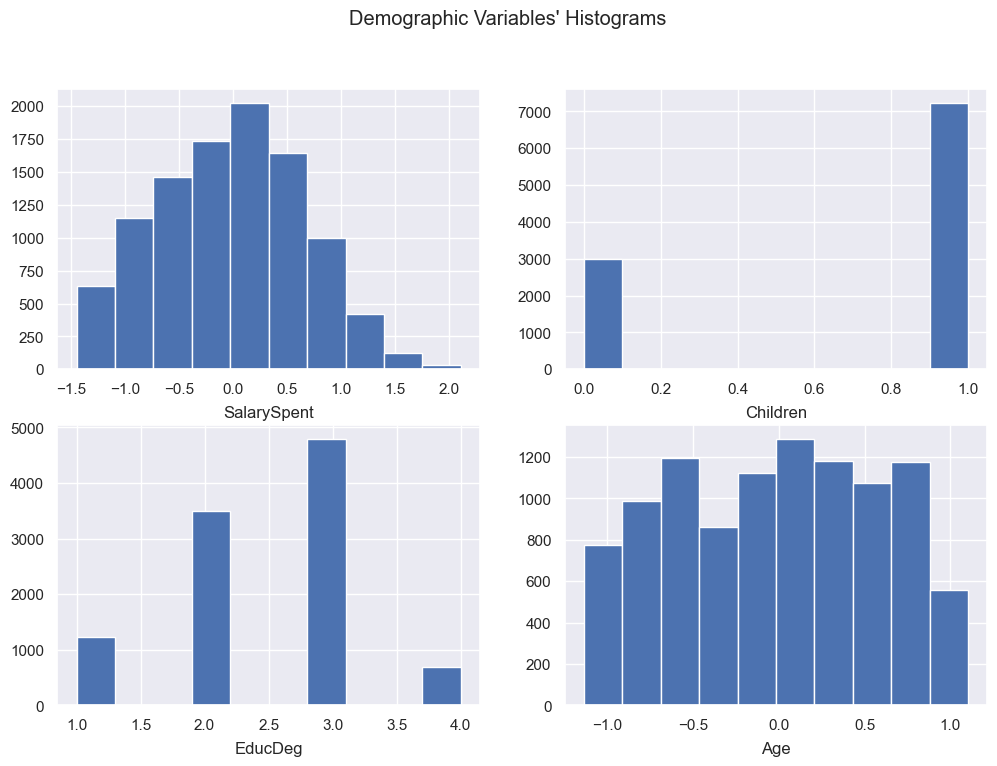

In [387]:
# Distribution of Demographic features
sns.set()

fig, axes = plt.subplots(2, ceil(len(demographic_features) / 2), figsize=(12, 8))

for ax, feat in zip(axes.flatten(), demographic_features): #
    ax.hist(df3Demographic[feat])
    ax.set_title(feat, y=-0.2)
    

title = "Demographic Variables' Histograms"

plt.suptitle(title)

plt.show()

title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manually, not adjusting
title position was updated manu

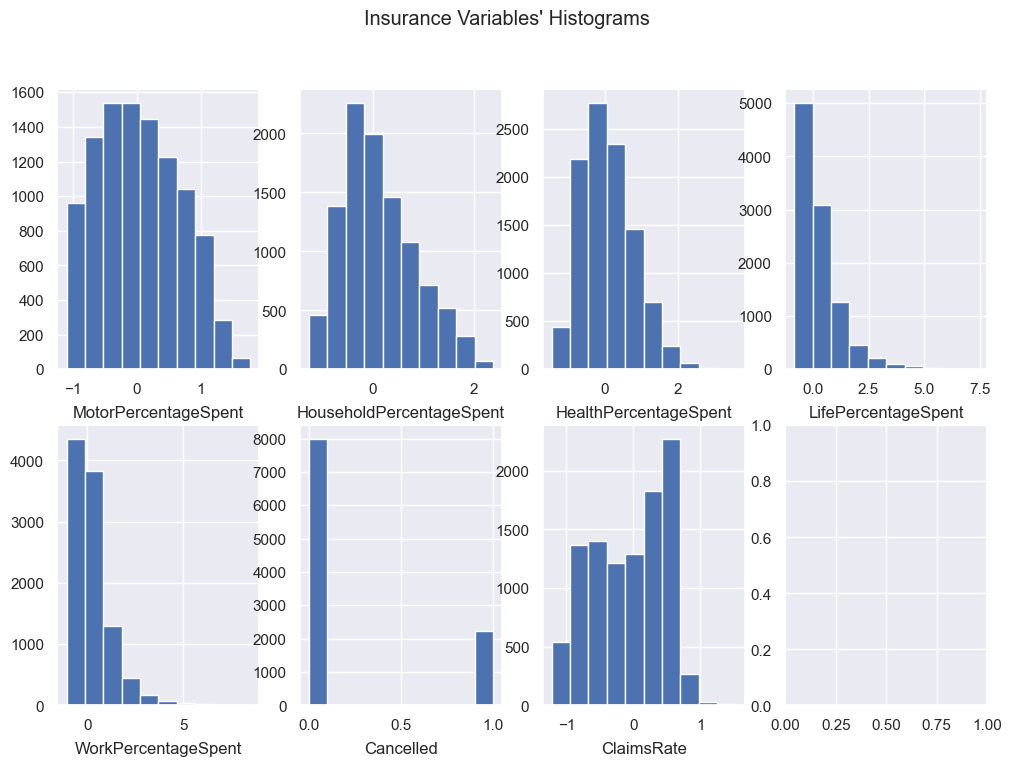

In [388]:
# Distribution of insurance features
sns.set()

fig, axes = plt.subplots(2, ceil(len(insurance_features) / 2), figsize=(12, 8))

for ax, feat in zip(axes.flatten(), insurance_features): #
    ax.hist(df3Insurance[feat])
    ax.set_title(feat, y=-0.2)
    

title = "Insurance Variables' Histograms"

plt.suptitle(title)

plt.show()

<hr>
<a class="anchor" id="exports">
    
# 10. Exporting the final datasets
    
</a>

In [389]:
path = r'C:\Users\marto\Mestrado\DataMiningClass\Group Work Materials-20221101'
df.to_csv(os.path.join(path, 'df.csv'))

In [390]:
path = r'C:\Users\marto\Mestrado\DataMiningClass\Group Work Materials-20221101'
df_outliers_ohc.to_csv(os.path.join(path, 'df_outliers_ohc.csv'))